### Проект 2 [Цена дома]

Вам предоставляется набор данных, содержащий информацию о домах и **ценах**. Набор данных уже разделен на ```train.csv``` и ```test.csv```. Файл ```data_description.txt``` содержит описание столбцов.

**Цель:** построить модели для прогнозирования цен на дома.

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик регрессии.

**Примечание:** вам **рекомендуется** искать другие алгоритмы машинного обучения в Интернете (не ограничиваясь материалом курса), но вы должны изучить и понять эти алгоритмы. Вы не можете удалить ни одну строку в файле test.csv.

# **1. ОЧИСТКА ДАННЫХ**

## **1.1.  БЛОК ИМПОРТА**

In [1]:
from pandas import options
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# модули обучения и построения моделей
from src.utils import *
from src.plotter import *
from src.linear_regression import *
from src.forest import *
from src.encoders import *
from src.bayes_isotonic import *


## **1.2. ЗАГРУЗКА ДАННЫХ**

In [2]:
# присвоение данных
df_train = load_data(file="./train.csv")
df_test = load_data(file="./test.csv")

## **1.3. ИССЛЕДОВАНИЕ ВВОДНЫХ ДАННЫХ**

### **1.3.1. `Тренировочные данные` 'train'**

1. При визуальном осмотре файла аномалий в виде непонятных и "грязных" данных не выявлено.
2. Вывод данных на экран и первичный сбор информации показывает наличие в выборке большое количество отсутствующих значений (NaN).
3. Требуется подготовка выборки для обучения модели для столбцов с отсутствующими данными.
4. Ход решения указан в соотвествующих шагах обработки выборки.

In [3]:
# тренировочная выборка
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1030         160       RM         21.0     1680   Pave   NaN      Reg   
1      366          70       RM         59.0    10690   Pave   NaN      Reg   
2      883          60       RL          NaN     9636   Pave   NaN      IR1   
3       94         190  C (all)         60.0     7200   Pave   NaN      Reg   
4     1360          20       RL        129.0    16737   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1309   953          85       RL         60.0     7200   Pave   NaN      Reg   
1310   316          60       RL         71.0     7795   Pave   NaN      IR1   
1311   206          20       RL         99.0    11851   Pave   NaN      Reg   
1312   545          60       RL         58.0    17104   Pave   NaN      IR1   
1313  1240          20       RL         64.0     9037   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1309         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1310         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1311         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1312         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1313         HLS    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         5   2006        WD         Normal     118000  
1         7   2009        WD         Normal     147000  
2        12   2009        WD         Normal     178000  
3        11   2007        WD         Normal     133900  
4         9   2006        WD         Normal     315000  
...     ...    ...       ...            ...        ...  
1309      4   2009        WD         Normal     133900  
1310      7   2009        WD         Normal     188500  
1311      5   2009        WD         Normal     180500  
1312      9   2006       New        Partial     179665  
1313     12   2007        WD         Normal     265900  

[1314 rows x 81 columns]

#### 1.3.1.1. Статистика по типам данным

Требуется дополнительное исследование на отсутствующие данные для некоторых столбцов.

In [4]:
# статистика по типам данным
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1314 non-null   int64  
 1   MSSubClass     1314 non-null   int64  
 2   MSZoning       1314 non-null   object 
 3   LotFrontage    1078 non-null   float64
 4   LotArea        1314 non-null   int64  
 5   Street         1314 non-null   object 
 6   Alley          83 non-null     object 
 7   LotShape       1314 non-null   object 
 8   LandContour    1314 non-null   object 
 9   Utilities      1314 non-null   object 
 10  LotConfig      1314 non-null   object 
 11  LandSlope      1314 non-null   object 
 12  Neighborhood   1314 non-null   object 
 13  Condition1     1314 non-null   object 
 14  Condition2     1314 non-null   object 
 15  BldgType       1314 non-null   object 
 16  HouseStyle     1314 non-null   object 
 17  OverallQual    1314 non-null   int64  
 18  OverallC

#### 1.3.1.2. Выявление уникальных значений выборки

Результат с пустым значением уникальных значений для данной выборки свидетельствует о `большом наличии 'NaN-значений'`.

In [5]:
df_train.value_counts()

Series([], dtype: int64)

#### 1.3.1.3. Описание выборки с числовыми типами данных

In [6]:
# Предварительное неполное описание выборки
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1314.000000  1314.000000  1078.000000    1314.000000  1314.000000   
mean    731.761796    56.910198    70.099258   10523.983257     6.093607   
std     423.718242    42.469517    24.695629   10245.456554     1.392365   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     363.250000    20.000000    59.000000    7558.500000     5.000000   
50%     731.500000    50.000000    69.000000    9504.000000     6.000000   
75%    1101.500000    70.000000    80.000000   11596.000000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1314.000000  1314.000000   1314.000000  1307.000000  1314.000000  ...   
mean      5.566971  1971.123288   1984.904110   102.987758   447.671233  ...   
std       1.120537    30.566173     20.698943   178.744271   459.766632  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1972.500000   1994.000000     0.000000   384.000000  ...   
75%       6.000000  2001.000000   2004.000000   166.000000   718.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1314.000000  1314.000000    1314.000000  1314.000000  1314.000000   
mean     95.470320    47.578387      22.605784     3.200913    15.815830   
std     126.726611    67.821820      61.914098    29.371598    57.377755   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    69.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1314.000000   1314.000000  1314.000000  1314.000000    1314.000000  
mean      3.065449     44.812785     6.359970  2007.815068  181045.474886  
std      42.341109    519.066668     2.709428     1.324691   79863.285965  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130000.000000  
50%       0.000000      0.000000     6.000000  2008.000000  162950.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

#### **1.3.1.3.1. Графическое представление тренировочной выборки**

Высокое значение `std` для 'SalePrice' говорит о высоком разбросе цен во всём обучаемом диапазоне. График концентрации (правая грань) показывает моду справа, оставляя слева аномальное наименьшее распределение цен.

Такое распределение данных говорит о нелинейности роста цен.

Зависимость 'SalePrice' от параметров будет показано в разделе обучения моделей.

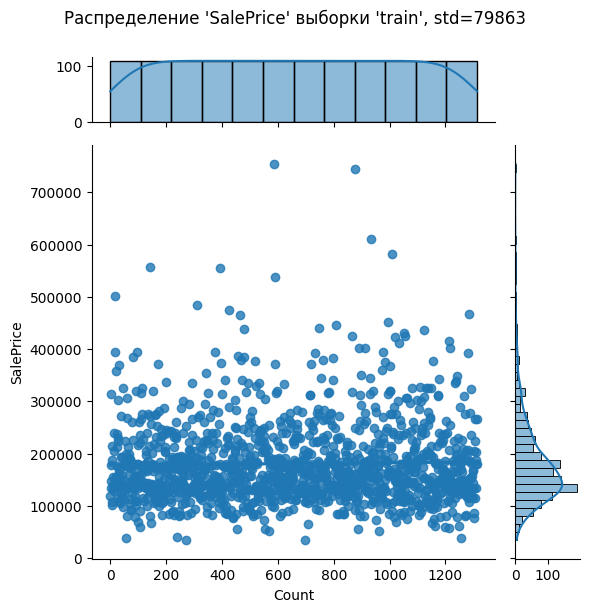

In [7]:
# Распределение 'SalePrice'
g = sns.jointplot(df_train['SalePrice'], kind="reg", marginal_ticks=True);
# plt.suptitle(f"Распределение 'SalePrice' выборки 'train', std={int(df_train['SalePrice'].std())}");
g.fig.suptitle(f"Распределение 'SalePrice' выборки 'train', std={int(df_train['SalePrice'].std())}");
g.fig.tight_layout();
g.fig.subplots_adjust(top=0.9); # отступ от графика для заголовка
plt.xlabel("Count");


#### **1.3.1.4. Пустые значения в таблице**

##### 1.3.1.4.1. Определение количества и названия пустых значений

Определены **19 столбцов** с разным процентным соотношением отсутствующих данных `missing_percent`. На первом этапе обработки этих данных принято решение:
1. Удалить из модели обучения все данные с показателями `missing_percent > 15%`.
2. Оставшиеся данные проверить на уникальные значения с последующим принятии решения об их использовании в обучении модели.

In [8]:
# определение количества и названия пустых значений
df_train_nan_percent, train_nan_columns_list = get_missing_data(df_data=df_train)

# ОТЛАДКА
# print(train_nan_columns_list)  # все столбцы, содержащие значения 'NaN'

# анализ 'NaN'
df_train_nan_percent

Доля отсутсвующих значений 'NaN' в исходных данных по 19 столбцам
Всего строк:  1314


nan_rows  data_percent  missing_percent datatype
PoolQC          1307.0         0.533           99.467   object
MiscFeature     1266.0         3.653           96.347   object
Alley           1231.0         6.317           93.683   object
Fence           1068.0        18.721           81.279   object
FireplaceQu      621.0        52.740           47.260   object
LotFrontage      236.0        82.040           17.960  float64
GarageYrBlt       78.0        94.064            5.936  float64
GarageCond        78.0        94.064            5.936   object
GarageType        78.0        94.064            5.936   object
GarageFinish      78.0        94.064            5.936   object
GarageQual        78.0        94.064            5.936   object
BsmtFinType2      32.0        97.565            2.435   object
BsmtExposure      32.0        97.565            2.435   object
BsmtQual          31.0        97.641            2.359   object
BsmtCond          31.0        97.641            2.359   object
BsmtFinType1      31.0        97.641            2.359   object
MasVnrArea         7.0        99.467            0.533  float64
MasVnrType         7.0        99.467            0.533   object
Electrical         1.0        99.924            0.076   object

##### 1.3.1.4.2. Строки где только значения 'NaN'

Отсутствие строк с полностью отсутствующими данными позволяет использовать все строки выборки для обучения модели.

In [9]:
# строки где только значения 'NaN'
df_train_NAN_all = get_nan_all(df_data=df_train)
df_train_NAN_all

Всего строк в выборке: 1314
Потеряно строк: 0
Новое прогнозируемое количество строк: 1314


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

##### 1.3.1.4.3. Строки где есть значения 'NaN'

Пустые значения есть во всех строках. Это говорит о том, что не смотря на результат в шаге `++++` требуется дополнительное исследование данных **по столбцам** для подготовки для обучения модели.


In [10]:
# строки где есть знаяения 'NaN'
df_train_NAN_any = get_nan_any(df_data=df_train)
df_train_NAN_any


Всего строк: 1314
Потеряно строк: 0
Новое прогнозируемое количество строк: 0


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1030         160       RM         21.0     1680   Pave   NaN      Reg   
1      366          70       RM         59.0    10690   Pave   NaN      Reg   
2      883          60       RL          NaN     9636   Pave   NaN      IR1   
3       94         190  C (all)         60.0     7200   Pave   NaN      Reg   
4     1360          20       RL        129.0    16737   Pave   NaN      Reg   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1309   953          85       RL         60.0     7200   Pave   NaN      Reg   
1310   316          60       RL         71.0     7795   Pave   NaN      IR1   
1311   206          20       RL         99.0    11851   Pave   NaN      Reg   
1312   545          60       RL         58.0    17104   Pave   NaN      IR1   
1313  1240          20       RL         64.0     9037   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1309         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1310         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1311         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1312         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1313         HLS    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         5   2006        WD         Normal     118000  
1         7   2009        WD         Normal     147000  
2        12   2009        WD         Normal     178000  
3        11   2007        WD         Normal     133900  
4         9   2006        WD         Normal     315000  
...     ...    ...       ...            ...        ...  
1309      4   2009        WD         Normal     133900  
1310      7   2009        WD         Normal     188500  
1311      5   2009        WD         Normal     180500  
1312      9   2006       New        Partial     179665  
1313     12   2007        WD         Normal     265900  

[1314 rows x 81 columns]

##### 1.3.1.4.4. Повторное выявление уникальных значений выборки

Результат с пустым значением уникальных значений для данной выборки свидетельствует о `большом наличии 'NaN-значений'` или **отсутствии** уникальных значений.

In [11]:
df_train[train_nan_columns_list].value_counts()


Series([], dtype: int64)

##### 1.3.1.4.5. Таблица из столбцов с пустыми ячейками

In [12]:
# Таблица из столбцов с пустыми ячейками
df_train[train_nan_columns_list]

PoolQC MiscFeature Alley  Fence FireplaceQu  LotFrontage  GarageYrBlt  \
0       NaN         NaN   NaN    NaN         NaN         21.0       1972.0   
1       NaN         NaN   NaN    NaN         NaN         59.0       1964.0   
2       NaN         NaN   NaN  MnPrv          TA          NaN       1993.0   
3       NaN         NaN   NaN    NaN          Gd         60.0       1900.0   
4       NaN         NaN   NaN    NaN          Gd        129.0       2004.0   
...     ...         ...   ...    ...         ...          ...          ...   
1309    NaN         NaN   NaN  MnPrv         NaN         60.0       1974.0   
1310    NaN         NaN   NaN    NaN          Gd         71.0       2004.0   
1311    NaN         NaN   NaN    NaN         NaN         99.0       1990.0   
1312    NaN         NaN   NaN    NaN          Gd         58.0       2006.0   
1313    NaN         NaN   NaN    NaN          Gd         64.0       2006.0   

     GarageCond GarageType GarageFinish GarageQual BsmtFinType2 BsmtExposure  \
0            TA     Detchd          Unf         TA          Unf           No   
1            Fa     Detchd          Unf         TA          Unf           No   
2            TA    BuiltIn          RFn         TA          Unf           No   
3            TA     Detchd          Unf         TA          Unf           Mn   
4            TA     Attchd          Fin         TA          Unf           Av   
...         ...        ...          ...        ...          ...          ...   
1309         TA     Detchd          Fin         TA          Unf           Av   
1310         TA     Attchd          Fin         TA          Unf           No   
1311         TA     Attchd          RFn         TA          Unf           No   
1312         TA     Attchd          RFn         TA          Unf           Av   
1313         TA     Attchd          RFn         TA          Unf           Av   

     BsmtQual BsmtCond BsmtFinType1  MasVnrArea MasVnrType Electrical  
0          TA       TA          BLQ       281.0    BrkFace      SBrkr  
1          TA       Fa          Rec         0.0       None      FuseA  
2          Gd       TA          Unf         0.0       None      SBrkr  
3          TA       Fa          Rec         0.0       None      SBrkr  
4          Ex       TA          GLQ        66.0    BrkFace      SBrkr  
...       ...      ...          ...         ...        ...        ...  
1309       Gd       TA          GLQ         0.0       None      SBrkr  
1310       Gd       TA          GLQ         0.0       None      SBrkr  
1311       Gd       TA          Unf         0.0       None      SBrkr  
1312       Gd       Gd          GLQ         0.0       None      SBrkr  
1313       Gd       TA          GLQ        32.0    BrkFace      SBrkr  

[1314 rows x 19 columns]

##### 1.3.1.4.6. Проверка на уникальные значения после удаления столбцов с 'NaN'

Вывод о большом количестве пустых ячеек подтверждён. Появилось отображение уникальных значений для оставшихся данных выборки.

In [13]:
# Проверка на уникальные значения после удаления столбцов с 'NaN'
df_train_excluded = df_train.drop(train_nan_columns_list, axis=1)
print(df_train_excluded.shape)
df_train_excluded.value_counts()

(1314, 62)


Id    MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  ExterQual  ExterCond  Foundation  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  GarageCars  GarageArea  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice
1     60          RL        8450     Pave    Reg       Lvl          AllPub     Inside     Gtl        CollgCr       Norm        Norm        1Fam      2Story      7            5            2003       2003          Gable      CompShg   VinylSd      VinylSd      Gd         TA         PCon

##### 1.3.1.4.7. Список столбцов с более 15% потерь данных

Количество уникальных значений **'NaN'** для каждого столбца достаточно **велико** для обучения модели. Эти столбцы **можно исключить**.

In [14]:
train_nan_columns_more15_list = list(df_train_nan_percent[df_train_nan_percent["missing_percent"] > 15].index)

for val in train_nan_columns_more15_list:
    print(val + f" [количество = {len(df_train[val].unique())}]",
          df_train[val].value_counts(dropna=False).to_dict(),
          sep="\n", end="\n" + "-"*80 + "\n")



PoolQC [количество = 4]
{nan: 1307, 'Gd': 3, 'Fa': 2, 'Ex': 2}
--------------------------------------------------------------------------------
MiscFeature [количество = 5]
{nan: 1266, 'Shed': 43, 'Gar2': 2, 'Othr': 2, 'TenC': 1}
--------------------------------------------------------------------------------
Alley [количество = 3]
{nan: 1231, 'Grvl': 47, 'Pave': 36}
--------------------------------------------------------------------------------
Fence [количество = 5]
{nan: 1068, 'MnPrv': 137, 'GdPrv': 53, 'GdWo': 46, 'MnWw': 10}
--------------------------------------------------------------------------------
FireplaceQu [количество = 6]
{nan: 621, 'Gd': 348, 'TA': 276, 'Fa': 28, 'Ex': 23, 'Po': 18}
--------------------------------------------------------------------------------
LotFrontage [количество = 109]
{nan: 236, 60.0: 129, 80.0: 65, 70.0: 62, 50.0: 52, 75.0: 49, 65.0: 38, 85.0: 32, 78.0: 23, 90.0: 23, 21.0: 21, 68.0: 18, 64.0: 18, 24.0: 17, 55.0: 16, 73.0: 15, 51.0: 15, 79.0: 

##### 1.3.1.4.8. Список столбцов с менее 15% потерь данных

1. Количество уникальных значений для каждого столбца достаточно велико, чтобы пренебречь ими для обучения модели.
2. Столбцы с количественными типами данных тоже искючаются по причине возможного искажения данных при замене 'NaN', что повлияет на обучение модели.
3. Для остальных типов данных значение 'NaN' не критично и можно для таких значений выделить отдельную категорию при обучении модели.

In [15]:
# список НЕ ЦИФРОВЫХ столбцов с 'NaN' с менее 15% потерь данных
train_nan_columns_less15_list = list(df_train_nan_percent[(df_train_nan_percent["missing_percent"] < 15) & (df_train_nan_percent["datatype"] != 'float64')].index)
# print(train_nan_columns_less15_list)

for val in train_nan_columns_less15_list:
    print(val + f" [количество уникальных значений = {len(df_train[val].unique())}]",
          df_train[val].value_counts(dropna=False).to_dict(),
          sep="\n", end="\n" + "-"*80 + "\n")



GarageCond [количество уникальных значений = 6]
{'TA': 1186, nan: 78, 'Fa': 33, 'Gd': 9, 'Po': 7, 'Ex': 1}
--------------------------------------------------------------------------------
GarageType [количество уникальных значений = 7]
{'Attchd': 787, 'Detchd': 338, 'BuiltIn': 78, nan: 78, 'Basment': 18, 'CarPort': 9, '2Types': 6}
--------------------------------------------------------------------------------
GarageFinish [количество уникальных значений = 4]
{'Unf': 539, 'RFn': 385, 'Fin': 312, nan: 78}
--------------------------------------------------------------------------------
GarageQual [количество уникальных значений = 6]
{'TA': 1172, nan: 78, 'Fa': 46, 'Gd': 13, 'Po': 3, 'Ex': 2}
--------------------------------------------------------------------------------
BsmtFinType2 [количество уникальных значений = 7]
{'Unf': 1135, 'Rec': 51, 'LwQ': 42, nan: 32, 'BLQ': 27, 'ALQ': 16, 'GLQ': 11}
--------------------------------------------------------------------------------
BsmtExposur

In [16]:
# проверка типов данных, где есть 'NaN'
df_train[train_nan_columns_less15_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageCond    1236 non-null   object
 1   GarageType    1236 non-null   object
 2   GarageFinish  1236 non-null   object
 3   GarageQual    1236 non-null   object
 4   BsmtFinType2  1282 non-null   object
 5   BsmtExposure  1282 non-null   object
 6   BsmtQual      1283 non-null   object
 7   BsmtCond      1283 non-null   object
 8   BsmtFinType1  1283 non-null   object
 9   MasVnrType    1307 non-null   object
 10  Electrical    1313 non-null   object
dtypes: object(11)
memory usage: 113.0+ KB


### **1.3.1.5. ФОРМИРОВАНИЕ ВЫБОРКИ ДЛЯ ОБУЧЕНИЯ МОДЕЛИ**

In [17]:
# список столбцов для удаления из модели
columns_for_drop_list = list(set(train_nan_columns_list) - set(train_nan_columns_less15_list))
# выборка для обучения
df_train_droped = df_train.drop(columns_for_drop_list, axis=1)

# список толбцов выборки для обучения
total_train_columns_list = df_train.columns.to_list()   # все столбцы

df_train_droped

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0     1030         160       RM     1680   Pave      Reg         Lvl   
1      366          70       RM    10690   Pave      Reg         Lvl   
2      883          60       RL     9636   Pave      IR1         Lvl   
3       94         190  C (all)     7200   Pave      Reg         Lvl   
4     1360          20       RL    16737   Pave      Reg         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1309   953          85       RL     7200   Pave      Reg         Lvl   
1310   316          60       RL     7795   Pave      IR1         Lvl   
1311   206          20       RL    11851   Pave      Reg         Lvl   
1312   545          60       RL    17104   Pave      IR1         Lvl   
1313  1240          20       RL     9037   Pave      IR1         HLS   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub    Inside       Gtl  ...           218         0           0   
2       AllPub    Corner       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...             0         0          99   
4       AllPub       FR3       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1309    AllPub    Inside       Gtl  ...             0         0           0   
1310    AllPub    Inside       Gtl  ...             0         0           0   
1311    AllPub    Corner       Gtl  ...             0       508           0   
1312    AllPub    Inside       Gtl  ...             0         0           0   
1313    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       5    2006        WD         Normal    118000  
1           0       0       7    2009        WD         Normal    147000  
2           0       0      12    2009        WD         Normal    178000  
3           0       0      11    2007        WD         Normal    133900  
4           0       0       9    2006        WD         Normal    315000  
...       ...     ...     ...     ...       ...            ...       ...  
1309        0       0       4    2009        WD         Normal    133900  
1310        0       0       7    2009        WD         Normal    188500  
1311        0       0       5    2009        WD         Normal    180500  
1312        0       0       9    2006       New        Partial    179665  
1313        0       0      12    2007        WD         Normal    265900  

[1314 rows x 73 columns]

***
### **1.3.2. `Тестовые данные` 'test'**

In [18]:
# тестовая выборка
df_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1227          60       RL         86.0    14598   Pave   NaN      IR1   
1     932          20       RL         70.0     9100   Pave   NaN      Reg   
2     647          20       RL         60.0     7200   Pave   NaN      Reg   
3     547          50       RL         70.0     8737   Pave   NaN      IR1   
4     812         120       RM          NaN     4438   Pave   NaN      Reg   
..    ...         ...      ...          ...      ...    ...   ...      ...   
141   452          20       RL         62.0    70761   Pave   NaN      IR1   
142  1168          60       RL         58.0    10852   Pave   NaN      IR1   
143   641         120       RL         62.0    12677   Pave   NaN      IR1   
144    93          30       RL         80.0    13360   Pave  Grvl      IR1   
145  1042          60       RL          NaN     9130   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
0           Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1           Lvl    AllPub  ...        0    NaN  GdWo         NaN       0   
2           Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
3           Bnk    AllPub  ...        0    NaN   NaN         NaN       0   
4           Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
..          ...       ...  ...      ...    ...   ...         ...     ...   
141         Low    AllPub  ...        0    NaN   NaN         NaN       0   
142         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
143         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
144         HLS    AllPub  ...        0    NaN   NaN         NaN       0   
145         Lvl    AllPub  ...        0    NaN   NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
0        1   2008        WD         Normal     214000  
1        7   2009        WD         Normal     117500  
2        7   2008        WD         Normal      98300  
3        5   2007        WD         Normal     210000  
4        6   2008     ConLD         Normal     144500  
..     ...    ...       ...            ...        ...  
141     12   2006        WD         Normal     280000  
142      2   2006        WD         Normal     173000  
143      4   2008        WD         Normal     274000  
144      8   2009        WD         Normal     163500  
145      7   2008        WD         Normal     173000  

[146 rows x 81 columns]

#### 1.3.2.1. Корректировка столбцов

Так как для тренировочной выборки была сделана корректировка по обучающим столбцам, из тестовой выборки их можно удалить, предварительно проверив как распределяются данные в этих столбцах. Это может помочь в исследованиях поведения модели.

Сравнение выборок по отсутствующим данным показывает, что решение об удалении части столбцов является верным.

In [19]:
# исследование пустых данных выборки
df_test_droped = df_test.copy()
df_test_nan_percent, test_nan_columns_list = get_missing_data(df_test_droped)
print("Различие в столбцах, содержащих 'NaN' выборок: ", list(set(train_nan_columns_list) -  set(test_nan_columns_list)))
df_test_nan_percent

Доля отсутсвующих значений 'NaN' в исходных данных по 18 столбцам
Всего строк:  146
Различие в столбцах, содержащих 'NaN' выборок:  ['Electrical']


nan_rows  data_percent  missing_percent datatype
PoolQC           146.0         0.000          100.000  float64
MiscFeature      140.0         4.110           95.890   object
Alley            138.0         5.479           94.521   object
Fence            111.0        23.973           76.027   object
FireplaceQu       69.0        52.740           47.260   object
LotFrontage       23.0        84.247           15.753  float64
BsmtExposure       6.0        95.890            4.110   object
BsmtQual           6.0        95.890            4.110   object
BsmtCond           6.0        95.890            4.110   object
BsmtFinType2       6.0        95.890            4.110   object
BsmtFinType1       6.0        95.890            4.110   object
GarageYrBlt        3.0        97.945            2.055  float64
GarageFinish       3.0        97.945            2.055   object
GarageType         3.0        97.945            2.055   object
GarageQual         3.0        97.945            2.055   object
GarageCond         3.0        97.945            2.055   object
MasVnrType         1.0        99.315            0.685   object
MasVnrArea         1.0        99.315            0.685  float64

##### 1.3.2.2. Список столбцов с менее 15% потерь данных

1. Количество уникальных значений для каждого столбца достаточно велико, чтобы пренебречь ими для обучения модели.
2. Столбцы с количественными типами данных тоже искючаются по причине возможного искажения данных при замене 'NaN', что повлияет на обучение модели.
3. Для остальных типов данных значение 'NaN' не критично и можно для таких значений выделить отдельную категорию при обучении модели.

In [20]:
# список НЕ ЦИФРОВЫХ столбцов с 'NaN' с менее 15% потерь данных
test_nan_columns_less15_list = list(df_test_nan_percent[(df_test_nan_percent["missing_percent"] < 15) & (df_test_nan_percent["datatype"] != 'float64')].index)
# print(test_nan_columns_less15_list)

for val in test_nan_columns_less15_list:
    print(val + f" [количество уникальных значений = {len(df_test[val].unique())}]",
          df_test[val].value_counts(dropna=False).to_dict(),
          sep="\n", end="\n" + "-"*80 + "\n")



BsmtExposure [количество уникальных значений = 5]
{'No': 101, 'Av': 18, 'Gd': 14, 'Mn': 7, nan: 6}
--------------------------------------------------------------------------------
BsmtQual [количество уникальных значений = 5]
{'TA': 67, 'Gd': 61, 'Ex': 9, nan: 6, 'Fa': 3}
--------------------------------------------------------------------------------
BsmtCond [количество уникальных значений = 4]
{'TA': 129, 'Gd': 9, nan: 6, 'Fa': 2}
--------------------------------------------------------------------------------
BsmtFinType2 [количество уникальных значений = 7]
{'Unf': 121, nan: 6, 'BLQ': 6, 'LwQ': 4, 'Rec': 3, 'GLQ': 3, 'ALQ': 3}
--------------------------------------------------------------------------------
BsmtFinType1 [количество уникальных значений = 7]
{'Unf': 45, 'GLQ': 34, 'ALQ': 24, 'BLQ': 15, 'LwQ': 12, 'Rec': 10, nan: 6}
--------------------------------------------------------------------------------
GarageFinish [количество уникальных значений = 4]
{'Unf': 66, 'Fin': 40, 

### **1.4. СТАТИСТИЧЕСКИЕ ДАННЫЕ**

#### **1.4.1. Корреляция**

In [21]:
df_train_droped.corr(numeric_only=True)

Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000   -0.003994 -0.034591    -0.040534     0.026946   
MSSubClass    -0.003994    1.000000 -0.131879     0.017646    -0.050142   
LotArea       -0.034591   -0.131879  1.000000     0.102653    -0.002680   
OverallQual   -0.040534    0.017646  0.102653     1.000000    -0.089692   
OverallCond    0.026946   -0.050142 -0.002680    -0.089692     1.000000   
YearBuilt     -0.027362    0.015348  0.015852     0.571486    -0.370592   
YearRemodAdd  -0.039299    0.026460  0.015569     0.549897     0.076820   
BsmtFinSF1    -0.007743   -0.068920  0.217485     0.248508    -0.050497   
BsmtFinSF2    -0.002096   -0.081873  0.112879    -0.071135     0.036550   
BsmtUnfSF     -0.014922   -0.151618 -0.002572     0.308036    -0.137386   
TotalBsmtSF   -0.023679   -0.252107  0.263418     0.539941    -0.176485   
1stFlrSF       0.005144   -0.266485  0.299788     0.477914    -0.146322   
2ndFlrSF      -0.014260    0.313804  0.045667     0.282451     0.032497   
LowQualFinSF  -0.046117    0.046205  0.005050    -0.037186     0.041458   
GrLivArea     -0.012413    0.067322  0.262816     0.589919    -0.078356   
BsmtFullBath   0.001820    0.001707  0.153231     0.116955    -0.049885   
BsmtHalfBath  -0.027076    0.005046  0.055504    -0.032199     0.102346   
FullBath      -0.022678    0.119360  0.124368     0.547506    -0.200058   
HalfBath      -0.002214    0.168243  0.013819     0.261686    -0.057277   
BedroomAbvGr   0.033753   -0.020779  0.118215     0.092499     0.019744   
KitchenAbvGr   0.001007    0.284480 -0.017101    -0.186251    -0.089004   
TotRmsAbvGrd   0.025577    0.043083  0.191405     0.427765    -0.060613   
Fireplaces    -0.038842   -0.059516  0.267803     0.405752    -0.033141   
GarageCars     0.007829   -0.050164  0.151042     0.608126    -0.188961   
GarageArea     0.008524   -0.107824  0.177257     0.578832    -0.155291   
WoodDeckSF    -0.051516   -0.007831  0.166405     0.234826     0.004283   
OpenPorchSF   -0.005777   -0.016931  0.080301     0.301136    -0.031006   
EnclosedPorch -0.001524   -0.019014 -0.015556    -0.113911     0.064173   
3SsnPorch     -0.049613   -0.056358  0.025469     0.024085     0.021320   
ScreenPorch    0.006376   -0.022362  0.041787     0.068941     0.055500   
PoolArea       0.059633    0.008677  0.079736     0.068546    -0.001537   
MiscVal       -0.006916   -0.005788  0.039586    -0.027995     0.067377   
MoSold         0.018824   -0.017762 -0.010471     0.074238    -0.009828   
YrSold         0.000831   -0.017610 -0.007818    -0.031900     0.051706   
SalePrice     -0.038217   -0.093529  0.253816     0.792541    -0.080393   

               YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id             -0.027362     -0.039299   -0.007743   -0.002096  -0.014922   
MSSubClass      0.015348      0.026460   -0.068920   -0.081873  -0.151618   
LotArea         0.015852      0.015569    0.217485    0.112879  -0.002572   
OverallQual     0.571486      0.549897    0.248508   -0.071135   0.308036   
OverallCond    -0.370592      0.076820   -0.050497    0.036550  -0.137386   
YearBuilt       1.000000      0.595002    0.259948   -0.051103   0.140802   
YearRemodAdd    0.595002      1.000000    0.135484   -0.069623   0.172472   
BsmtFinSF1      0.259948      0.135484    1.000000   -0.048093  -0.488601   
BsmtFinSF2     -0.051103     -0.069623   -0.048093    1.000000  -0.214396   
BsmtUnfSF       0.140802      0.172472   -0.488601   -0.214396   1.000000   
TotalBsmtSF     0.392027      0.287880    0.532702    0.093266   0.414676   
1stFlrSF        0.288233      0.243225    0.459226    0.090626   0.322689   
2ndFlrSF       -0.005852      0.124591   -0.148005   -0.095718   0.001861   
LowQualFinSF   -0.183641     -0.056151   -0.065987    0.021241   0.031109   
GrLivArea       0.193355      0.280714    0.213502   -0.010223   0.245786   
BsmtFullBath    0.194896      0.127233    0.648835    0.147951  -0.421238   
BsmtHalfBat

#### 1.4.2. Кодирование категорийных данных способом '**Linear Encoding**'

#### 1.4.2.1. Закодированные данные

In [22]:
# закодированные данные
sc_train_x, sc_train_y, train_linear_dict, df_train_linear_encoded = get_encoded_data(df_data=df_train_droped)  # train
test_linear_dict, df_test_linear_encoded = get_encoded_data(df_data=df_test_droped, isTrain=False)              # test

In [23]:
# заколированная тренировочная выборка
df_train_linear_encoded

Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  \
0      919          12         4        6       1         3            3   
1      330           6         4      587       1         3            3   
2      792           5         3      459       1         0            3   
3       84          14         0      188       1         3            3   
4     1222           0         3      906       1         3            3   
...    ...         ...       ...      ...     ...       ...          ...   
1309   852           9         3      188       1         3            3   
1310   284           5         3      234       1         0            3   
1311   186           0         3      701       1         3            3   
1312   494           5         3      909       1         0            3   
1313  1111           0         3      381       1         0            1   

      Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0             0          4          0  ...              0          0   
1             0          4          0  ...             84          0   
2             0          0          0  ...              0          0   
3             0          0          0  ...              0          0   
4             0          3          0  ...              0          0   
...         ...        ...        ...  ...            ...        ...   
1309          0          4          0  ...              0          0   
1310          0          4          0  ...              0          0   
1311          0          0          0  ...              0         17   
1312          0          4          0  ...              0          0   
1313          0          4          0  ...              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0               0         0        0       4       0         8              4   
1               0         0        0       6       3         8              4   
2               0         0        0      11       3         8              4   
3               8         0        0      10       1         8              4   
4               0         0        0       8       0         8              4   
...           ...       ...      ...     ...     ...       ...            ...   
1309            0         0        0       3       3         8              4   
1310            0         0        0       6       3         8              4   
1311            0         0        0       4       3         8              4   
1312            0         0        0       8       0         6              5   
1313            0         0        0      11       1         8              4   

      SalePrice  
0           106  
1           200  
2           299  
3           152  
4           540  
...         ...  
1309        152  
1310        338  
1311        311  
1312        308  
1313        486  

[1314 rows x 73 columns]

#### 1.4.2.2. Корреляция параметров тренировочной выборки

Id  MSSubClass  MSZoning   LotArea    Street  LotShape  \
Id             1.000000    0.002333  0.002856 -0.010547  0.020220  0.034704   
MSSubClass     0.002333    1.000000  0.053454 -0.309018 -0.039126  0.091793   
MSZoning       0.002856    0.053454  1.000000 -0.085342  0.042521  0.060916   
LotArea       -0.010547   -0.309018 -0.085342  1.000000 -0.045571 -0.298637   
Street         0.020220   -0.039126  0.042521 -0.045571  1.000000 -0.001844   
...                 ...         ...       ...       ...       ...       ...   
MoSold         0.019241    0.003573 -0.028581 -0.010950  0.012778 -0.040495   
YrSold         0.001167   -0.017718 -0.021560 -0.027750 -0.027301  0.030651   
SaleType       0.020110    0.040336  0.097993 -0.025340 -0.019475  0.004809   
SaleCondition  0.001866   -0.023000  0.015790  0.056631  0.009086 -0.023801   
SalePrice     -0.036877   -0.055139 -0.235709  0.467358  0.031043 -0.279734   

               LandContour  Utilities  LotConfig  LandSlope  ...  \
Id               -0.034143   0.013714   0.059612   0.010955  ...   
MSSubClass       -0.014157  -0.027579   0.060270  -0.020691  ...   
MSZoning         -0.018880  -0.001497  -0.008564  -0.025315  ...   
LotArea          -0.052048   0.040036  -0.188699   0.144356  ...   
Street            0.120899   0.001706   0.023269  -0.208062  ...   
...                    ...        ...        ...        ...  ...   
MoSold           -0.024023  -0.054616   0.013176   0.006182  ...   
YrSold            0.034403   0.024695   0.003167   0.000721  ...   
SaleType         -0.024501  -0.132373   0.018510   0.054050  ...   
SaleCondition     0.033233  -0.093072   0.043939  -0.050031  ...   
SalePrice         0.018615  -0.017884  -0.069547   0.040172  ...   

               EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
Id                  0.003473  -0.042922     0.000458  0.059571 -0.012759   
MSSubClass         -0.011428  -0.063193    -0.011052  0.018756 -0.008466   
MSZoning            0.103385  -0.000853     0.013871 -0.003550  0.030924   
LotArea            -0.027901   0.086960     0.103934  0.072228  0.066010   
Street              0.022131   0.006642    -0.047366  0.004043 -0.066894   
...                      ...        ...          ...       ...       ...   
MoSold             -0.031127   0.036535     0.016886 -0.021635  0.005508   
YrSold             -0.005868   0.019755     0.011249 -0.061443  0.048708   
SaleType           -0.025632  -0.019947    -0.003027  0.017629  0.029891   
SaleCondition      -0.079956  -0.002623    -0.026636 -0.063628  0.015141   
SalePrice          -0.147611   0.053537     0.120205  0.060659 -0.021474   

                 MoSold    YrSold  SaleType  SaleCondition  SalePrice  
Id             0.019241  0.001167  0.020110       0.001866  -0.036877  
MSSubClass     0.003573 -0.017718  0.040336      -0.023000  -0.055139  
MSZoning      -0.028581 -0.021560  0.097993       0.015790  -0.235709  
LotArea       -0.010950 -0.027750 -0.025340       0.056631   0.467358  
Street         0.012778 -0.027301 -0.019475       0.009086   0.031043  
...                 ...       ...       ...            ...        ...  
MoSold         1.000000 -0.142285 -0.039812       0.005184   0.067267  
YrSold        -0.142285  1.000000 -0.003612       0.011159  -0.026902  
SaleType      -0.039812 -0.003612  1.000000       0.199161  -0.049304  
SaleCondition  0.005184  0.011159  0.199161       1.000000   0.230181  
SalePrice      0.067267 -0.026902 -0.049304       0.230181   1.000000  

[73 rows x 73 columns]

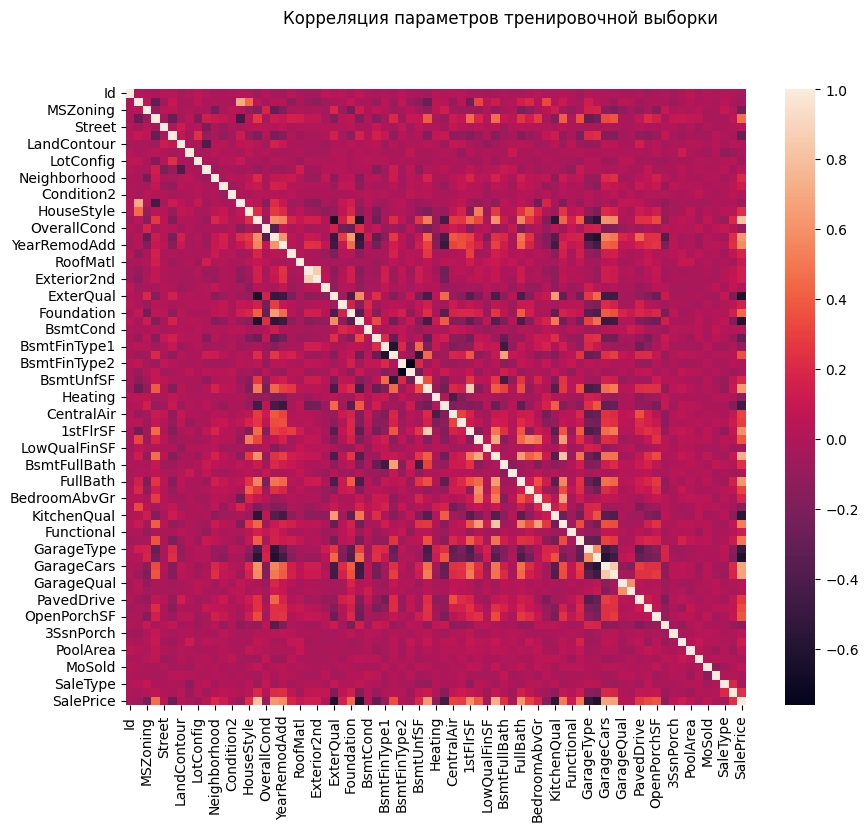

In [24]:
# визуализация корреляции выборки 'train'
fig, ax = plt.subplots(figsize=(10,8))
df_train_corr = df_train_linear_encoded.corr()
sns.heatmap(data=df_train_corr, ax=ax);
fig.suptitle("Корреляция параметров тренировочной выборки")

df_train_corr

#### 1.4.2.2.3. Корреляция 10 параметров наиболее скоррелированных данных к 'SalePrice' тренировочной выборки

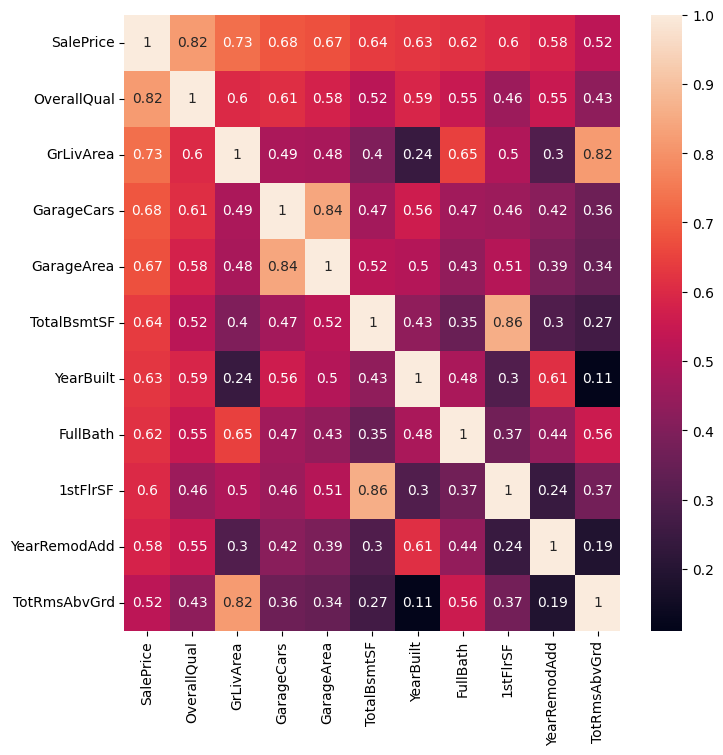

In [25]:
# наиболее коррелированные параметры с 'SalePrice'
important_list = df_train_corr["SalePrice"].nlargest(10+1).index[0:].values.tolist()

# визуализация корреляции выборки 'train'
fig, ax = plt.subplots(figsize=(8,8))
df_corr_large = df_train_linear_encoded[important_list].corr()
sns.heatmap(data=df_corr_large, annot=True, ax=ax);


####  1.4.2.3. Проверка типов столбцов исходной выборки

Наибольшая корреляция столбцов по отношению к 'SalePrice' проявляется у отобранных столбцов для обучения модели. Для проверки необходимости кодирования данных делается проверка типов исходных данных отобранных столбцов.

Исходные данные имеют цифровой формат данных и нет отсутствующих значений. Поэтому можно для обучения модели оставить их без кодирования для приведения типов.

In [26]:
# проверка типов столбцов исходной выборки
df_train[important_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalePrice     1314 non-null   int64
 1   OverallQual   1314 non-null   int64
 2   GrLivArea     1314 non-null   int64
 3   GarageCars    1314 non-null   int64
 4   GarageArea    1314 non-null   int64
 5   TotalBsmtSF   1314 non-null   int64
 6   YearBuilt     1314 non-null   int64
 7   FullBath      1314 non-null   int64
 8   1stFlrSF      1314 non-null   int64
 9   YearRemodAdd  1314 non-null   int64
 10  TotRmsAbvGrd  1314 non-null   int64
dtypes: int64(11)
memory usage: 113.0 KB


#### **1.4.3. <span style="color: red;">ВЫБОРКА ДЛЯ ОБУЧЕНИЯ МОДЕЛИ</span>**

In [27]:
# ТРЕНИРОВОЧНАЯ ВЫБОРКА
df_FINAL_TRAIN = df_train[["Id"] + important_list].copy()   # тренировка
df_FINAL_TEST  = df_test[["Id"] + important_list].copy()    # обучение

In [28]:
df_FINAL_TRAIN

Id  SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  \
0     1030     118000            6       1218           1         264   
1      366     147000            5       1344           1         468   
2      883     178000            6       1593           2         389   
3       94     133900            6       2291           2         506   
4     1360     315000            9       1980           3         770   
...    ...        ...          ...        ...         ...         ...   
1309   953     133900            5        768           1         396   
1310   316     188500            7       1432           2         432   
1311   206     180500            7       1442           2         500   
1312   545     179665            7       1496           2         426   
1313  1240     265900            8       1484           2         472   

      TotalBsmtSF  YearBuilt  FullBath  1stFlrSF  YearRemodAdd  TotRmsAbvGrd  
0             672       1972         1       672          1972             7  
1             672       1920         1       672          1997             6  
2             808       1992         2       808          1993             7  
3            1214       1910         2      1260          1998             9  
4            1980       2004         2      1980          2005             8  
...           ...        ...       ...       ...           ...           ...  
1309          768       1972         1       768          2003             5  
1310          716       2004         2       716          2005             6  
1311         1424       1990         2      1442          1990             5  
1312          654       2006         2       664          2006             7  
1313         1476       2006         2      1484          2006             6  

[1314 rows x 12 columns]

***
# **2.** <span style="color: red;">**ПРОГНОЗИРОВАНИЕ МОДЕЛИ</span>**

### **2.1. Linear Regression**

#### **2.1.1. Simple Linear Regression**

In [29]:
# словарь кодеров простой линейной регрессии
simple_train_linear_regressors_dict = train_simple_lin_regressors(df_data=df_FINAL_TRAIN, important=important_list[1:])
print(simple_train_linear_regressors_dict)

{'OverallQual': LinearRegression(), 'GrLivArea': LinearRegression(), 'GarageCars': LinearRegression(), 'GarageArea': LinearRegression(), 'TotalBsmtSF': LinearRegression(), 'YearBuilt': LinearRegression(), 'FullBath': LinearRegression(), '1stFlrSF': LinearRegression(), 'YearRemodAdd': LinearRegression(), 'TotRmsAbvGrd': LinearRegression()}


In [30]:
# прогнозирование
df_predictions_linear = linear_validation(regressors=simple_train_linear_regressors_dict, data=df_FINAL_TEST)
df_predictions_linear

Id  SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  \
0    1227     214000       176790     225339      265047      226886   
1     932     117500       131331     117612      129280      171001   
2     647      98300       131331     130757      197163      168897   
3     547     210000       176790     193491      197163      173573   
4     812     144500       176790     109383      197163      168897   
..    ...        ...          ...        ...         ...         ...   
141   452     280000       222248     182590      197163      205374   
142  1168     173000       176790     197339      197163      181056   
143   641     274000       267707     180987      197163      208180   
144    93     163500       131331     121780      197163      171703   
145  1042     173000       176790     193171      197163      183862   

     TotalBsmtSF  YearBuilt  FullBath  1stFlrSF  YearRemodAdd  TotRmsAbvGrd  
0         162481     230718    215670    147568        224573        245259  
1         165912     172567    135569    151410        141834        141314  
2          63521     151799    135569    166654        112285        193287  
3         181409     114416    135569    150171        112285        167300  
4         157389     226565    135569    141867        218663        115328  
..           ...        ...       ...       ...           ...           ...  
141       233214     186412    215670    226765        161534        141314  
142       169676     221026    215670    155624        210784        193287  
143       231553     225180    135569    224906        218663        167300  
144       160488     111647    135569    156244        222603        141314  
145       152076     173952    135569    135918        210784        193287  

[146 rows x 12 columns]

In [31]:
# Установка формата вывода для элементов серии
options.display.float_format = '{:.2f}'.format

In [32]:
# словарь с метриками всех моделей
metrics_dict = {}


print("МЕТРИКИ ПРОСТОЙ ЛИНЕЙНОЙ РЕГРЕССИЙ ПРЕДСКАЗАНИЯ 'SalePrice'")
df_simple_linear_metrics = get_metrics(df_data=df_predictions_linear)

metrics_dict['simple'] = [df_simple_linear_metrics]
df_simple_linear_metrics



МЕТРИКИ ПРОСТОЙ ЛИНЕЙНОЙ РЕГРЕССИЙ ПРЕДСКАЗАНИЯ 'SalePrice'


metrics   OverallQual     GrLivArea    GarageCars    GarageArea  \
0          MSE 2280012923.55 1929285751.95 3514056361.85 4215564606.87   
1         RMSE      47749.48      43923.64      59279.48      64927.38   
2          MAE      34711.16      30717.50      40565.47      43626.05   
3           R2          0.60          0.66          0.38          0.26   
4  Adjusted_R2          0.60          0.66          0.38          0.26   

    TotalBsmtSF     YearBuilt      FullBath      1stFlrSF  YearRemodAdd  \
0 3600782742.44 4572898865.14 3571994905.17 3533750873.77 4444884271.11   
1      60006.52      67623.21      59766.17      59445.36      66669.97   
2      45213.68      48242.55      41176.99      43302.28      46731.36   
3          0.37          0.20          0.37          0.38          0.22   
4          0.36          0.19          0.37          0.38          0.22   

   TotRmsAbvGrd  
0 3808539627.39  
1      61713.37  
2      43499.16  
3          0.33  
4          0.33

### **2.1.2. Анализ предсказания методом простой линейной регрессии**

О плохом качестве предсказания модели говорят:

1. **Низкие показатели** `Adjusted R2`.
2. **Большой разброс данных** на одиночных и общем графиках.

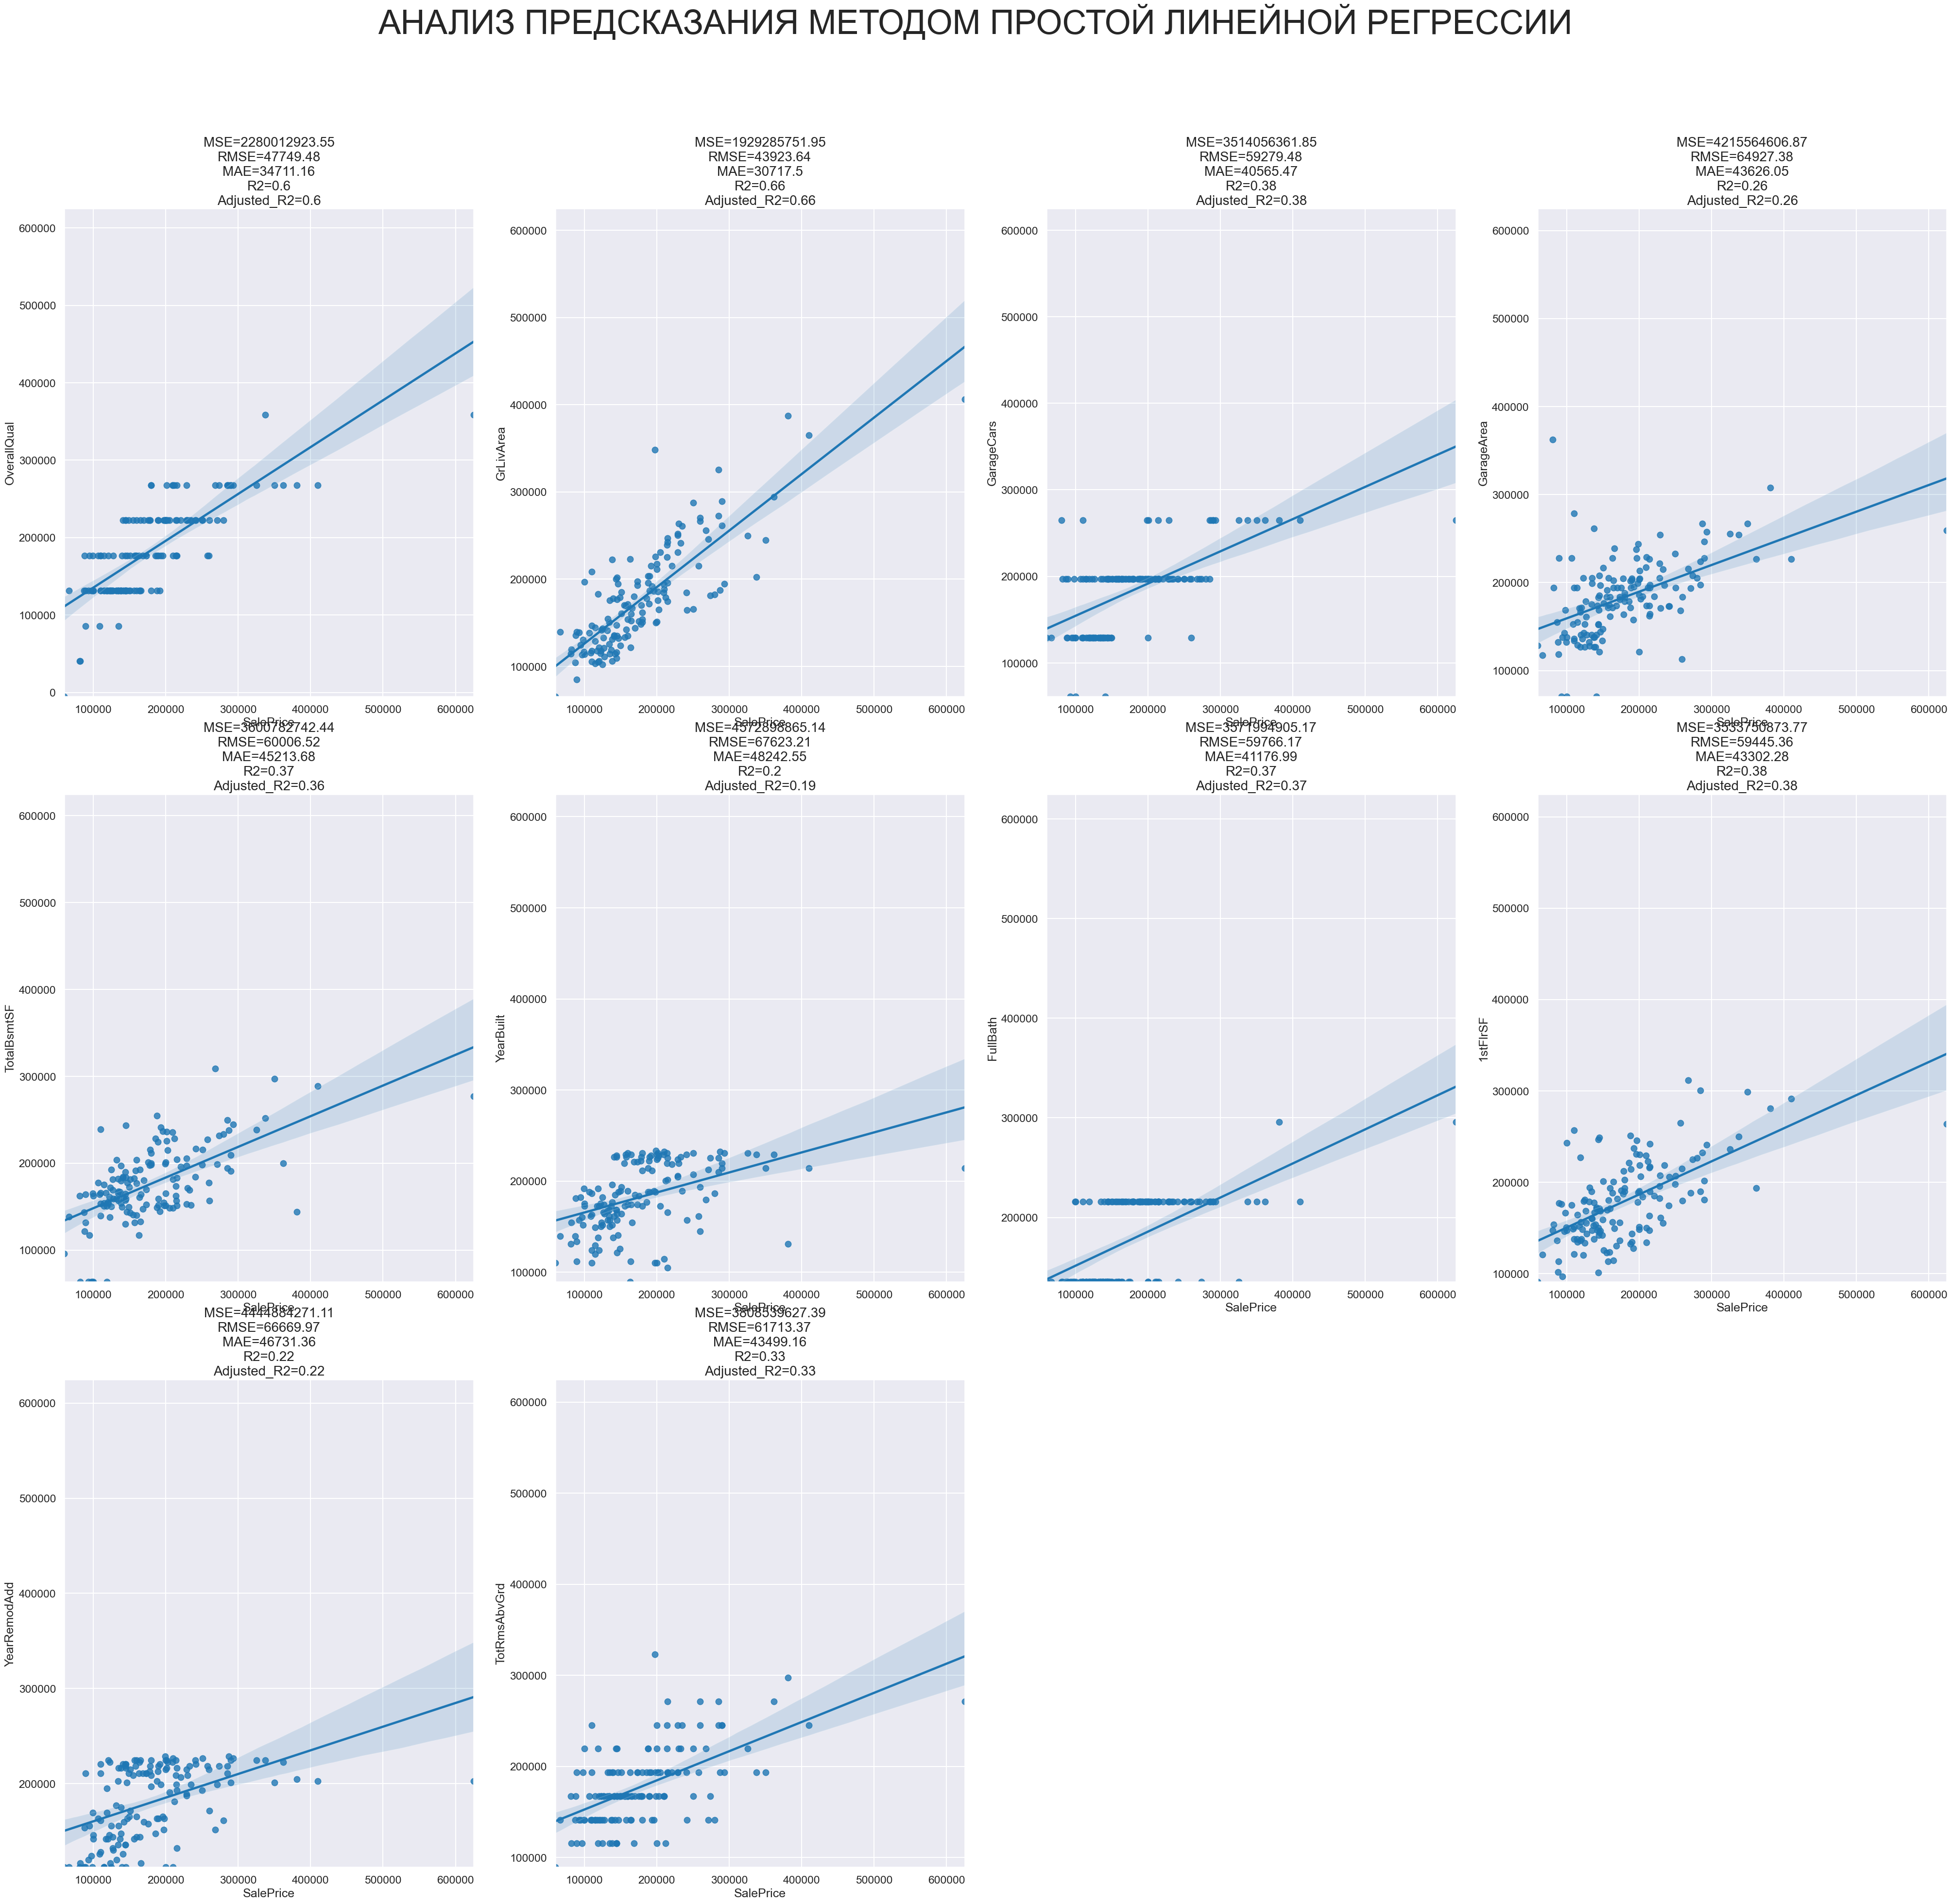

In [33]:
# АНАЛИЗ ПРЕДСКАЗАНИЯ МЕТОДОМ ПРОСТОЙ ЛИНЕЙНОЙ РЕГРЕССИИ
draw_predict_scatter(models_predictions=df_predictions_linear, df_metrics=df_simple_linear_metrics,
                     figsize=(50,60),
                     suptitlesize=50, titlesize=20,
                     suptitle="АНАЛИЗ ПРЕДСКАЗАНИЯ МЕТОДОМ ПРОСТОЙ ЛИНЕЙНОЙ РЕГРЕССИИ")

#### 2.1.3. Сравнение простой линейной регрессии для всех параметров

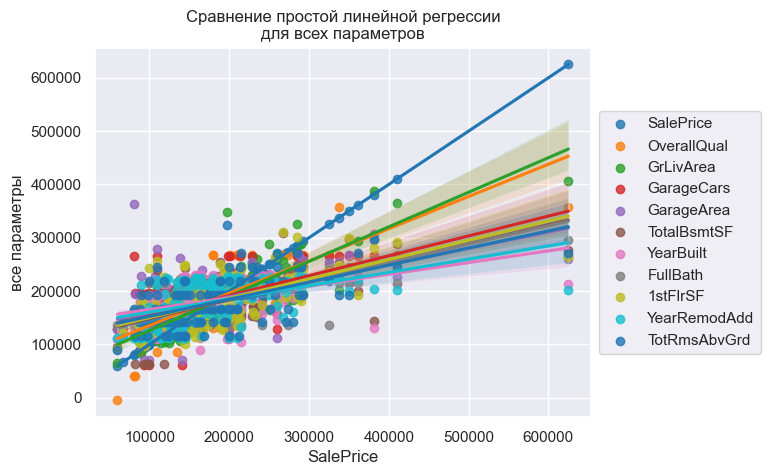

In [34]:
# Сравнение простой линейной регрессии для всех параметров
sns.set_context(context="notebook")
for colname in df_predictions_linear.columns.to_list()[1:]:
    g = sns.regplot(data=df_predictions_linear, x="SalePrice", y=colname, label=colname);
g.set_title("Сравнение простой линейной регрессии\nдля всех параметров");
g.set_ylabel("все параметры");
g.legend(loc='center left', bbox_to_anchor=(1, 0.5));

***
### **2.2. Multiple Linear Regression**

#### **2.2.1. Анализ предсказания методом множественной линейной регрессии**

О плохом качестве предсказания модели говорят:

1. Не смотря на то, что скопление предсказаний на графике прижимается к линии регрессии, значения метрик значительно отличается от того, чтобы на практике применять данную модель для предсказания цены 'SalePrice'.

2. При этом отмечается улучшение показателя `Adjusted R2`.

In [35]:
# обученная модель множественной регрессии
multiple_linear_regressor = train_linear_regressor(df_data=df_FINAL_TRAIN, important=important_list[1:])

# прогнозирование
df_predictions_multiple_linear = linear_validation(regressors=multiple_linear_regressor,
                                                   data=df_FINAL_TEST,
                                                   isSimple=False,
                                                   important=important_list[1:])

df_predictions_multiple_linear

Id  SalePrice  predict
0    1227     214000   223255
1     932     117500   111396
2     647      98300   104412
3     547     210000   161191
4     812     144500   156994
..    ...        ...      ...
141   452     280000   211687
142  1168     173000   193972
143   641     274000   255885
144    93     163500   123104
145  1042     173000   184327

[146 rows x 3 columns]

In [36]:

print("МЕТРИКИ ПРОСТОЙ ЛИНЕЙНОЙ РЕГРЕССИЙ ПРЕДСКАЗАНИЯ 'SalePrice'")
df_multiple_linear_metrics = get_metrics(df_data=df_predictions_multiple_linear)
metrics_dict['multiple'] = [df_multiple_linear_metrics]
df_multiple_linear_metrics

МЕТРИКИ ПРОСТОЙ ЛИНЕЙНОЙ РЕГРЕССИЙ ПРЕДСКАЗАНИЯ 'SalePrice'


metrics       predict
0          MSE 1101284983.28
1         RMSE      33185.61
2          MAE      23900.57
3           R2          0.81
4  Adjusted_R2          0.81

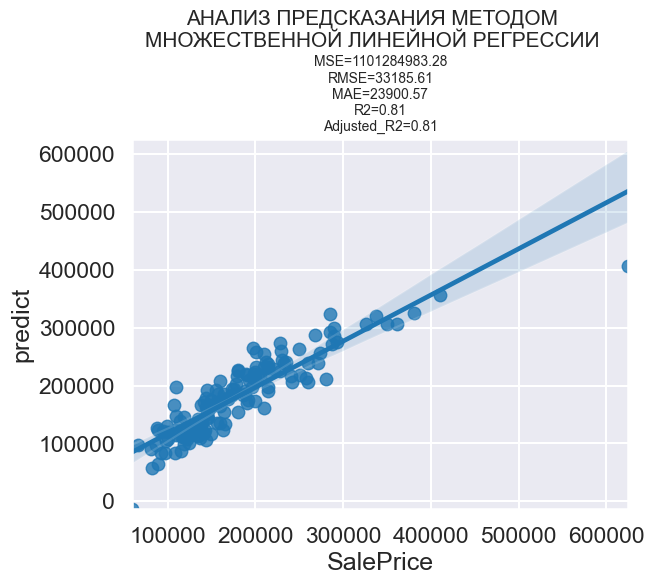

In [37]:
# АНАЛИЗ ПРЕДСКАЗАНИЯ МЕТОДОМ МНОЖЕСТВЕННОЙ ЛИНЕЙНОЙ РЕГРЕССИИ
draw_predict_scatter(models_predictions=df_predictions_multiple_linear, df_metrics=df_multiple_linear_metrics,
                     suptitlesize=15,
                     titlesize=10,
                     y_suptitle=1.15,
                     suptitle="АНАЛИЗ ПРЕДСКАЗАНИЯ МЕТОДОМ\nМНОЖЕСТВЕННОЙ ЛИНЕЙНОЙ РЕГРЕССИИ")

***
### **2.3. Polynomial Multy Linear Regression**

Текущая модель по-прежнему **не подходит для предсказания** 'SalePrice'. Но значительно изменилось поведение графика регрессии при изменении параметров `degree`. Уменьшилось значения `RMSE` примерно в 2 раза по сравнению с предыдущим моделями и выросло значение `Adjusted R2` до **0.89** при `degree=2`.

На коротких учасках нижнего диапазона пресказанных цен модель приближается к исходным показателям 'SalePrice'.

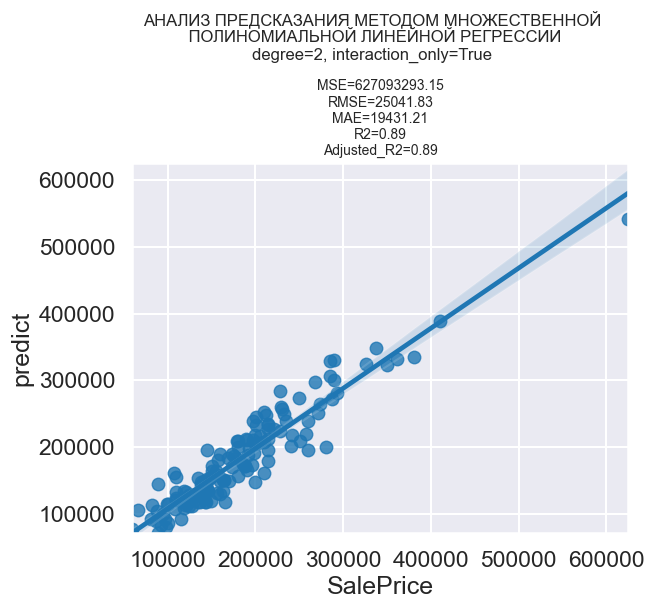

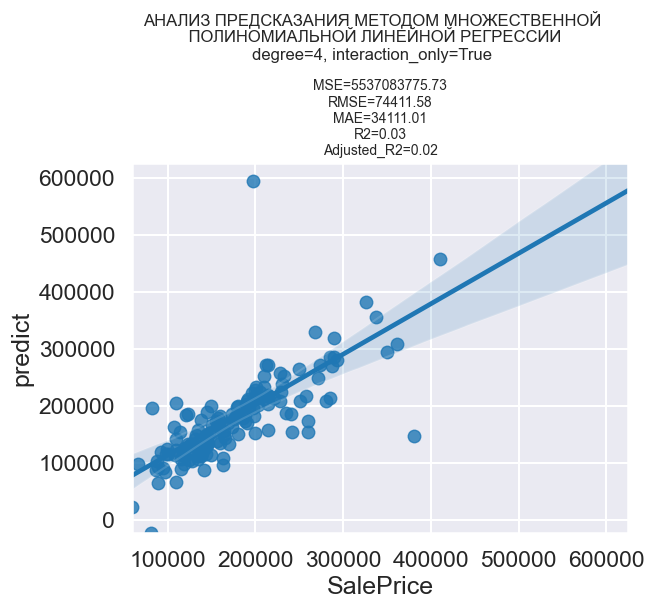

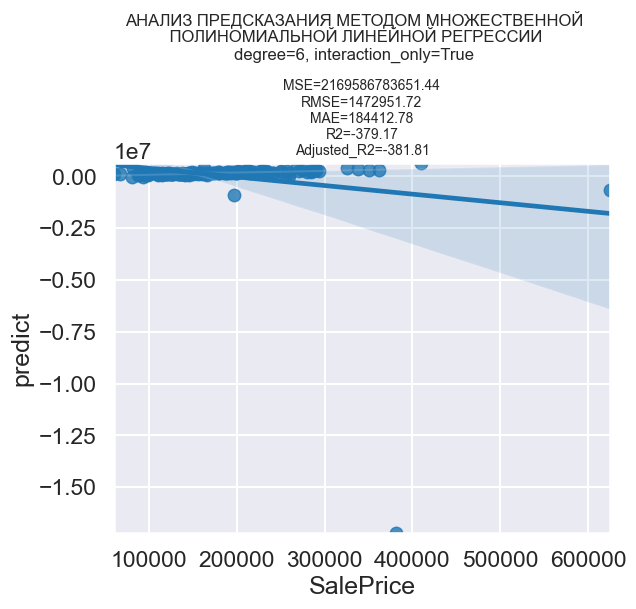

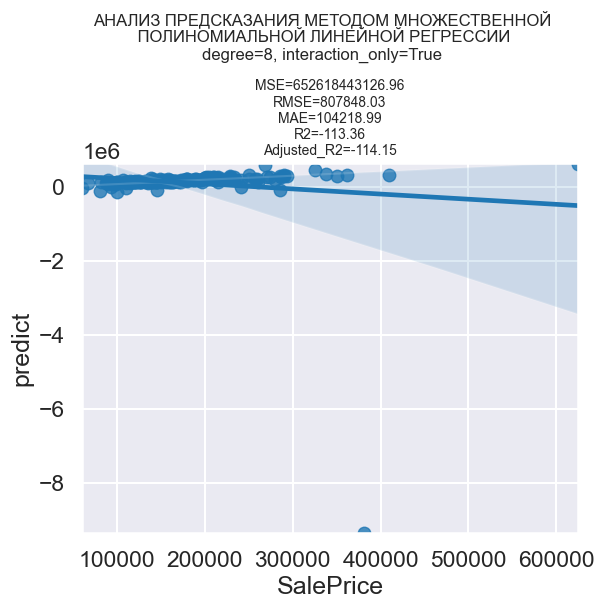

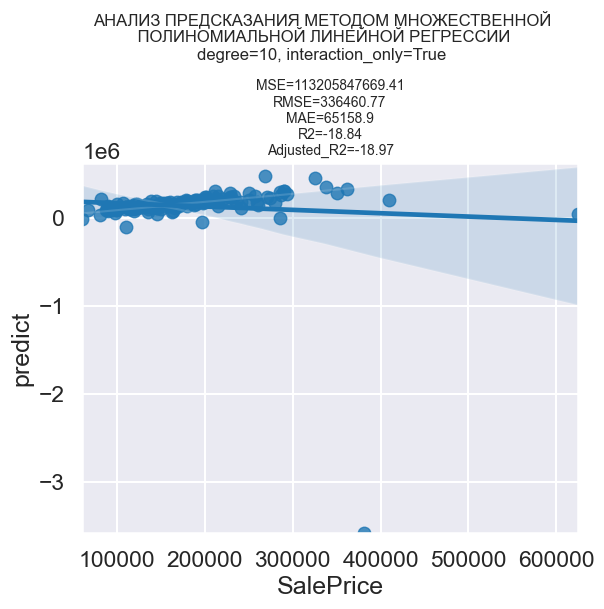

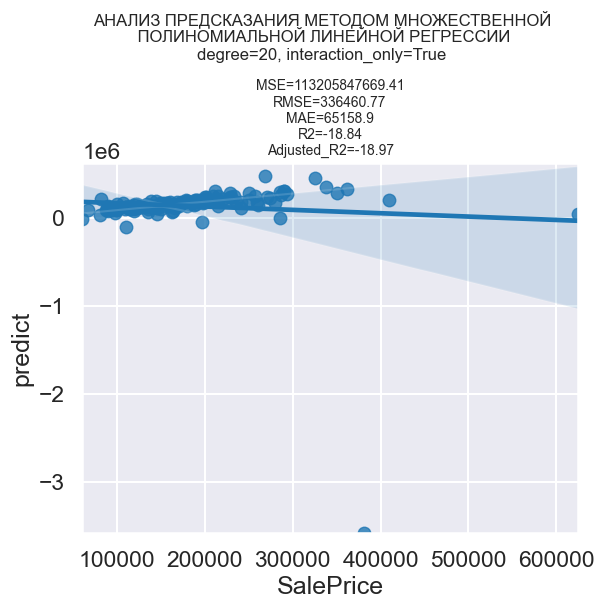

In [38]:
# ПОСТРОЕНИЕ ГРАФИКОВ СРАВНЕНИЯ ПРЕДСКАЗАНИЯ ПОЛИНОМИАЛЬНОЙ РЕГРЕССИИ

# список с метриками
metrics_list = {}

# 1. Диапазон 'degree=[2,10]'
for degree in range(2,11,2):
    _, _, df_polinomial_metrics = combination_polinomial(df_train=df_FINAL_TRAIN, df_test=df_FINAL_TEST,
                        parameters=important_list, degree=degree)
    metrics_list[degree] = df_polinomial_metrics


# 2. 'degree=20'
degree=20
_, _, df_polinomial_metrics = combination_polinomial(df_train=df_FINAL_TRAIN, df_test=df_FINAL_TEST,
                       parameters=important_list, degree=degree)
metrics_list[degree] = df_polinomial_metrics

# словарь метрик
metrics_dict['polinomial'] = metrics_list
# metrics_list.clear()




***
### **2.4. Random Forest**

Данная модель плохо предсказывает цену дома 'SalePrice'. У модели высокие ошибки отклонения не зависимо от комбинаций параметров.

In [39]:
# ОБУЧЕННАЯ МОДЕЛЬ СЛУЧАЙНОГО ЛЕСА
multiple_forest_regressor = train_random_forest_regressor(data=df_FINAL_TRAIN, parameters=important_list, n_estimators=1, random_state=0)
# print(multiple_forest_regressor)

df_multiple_forest_regressor = random_forest_validation(model=multiple_forest_regressor, data=df_FINAL_TEST)
df_multiple_forest_regressor


Id  SalePrice   predict
0    1227     214000 204750.00
1     932     117500  62383.00
2     647      98300 109500.00
3     547     210000 185000.00
4     812     144500 147360.00
..    ...        ...       ...
141   452     280000 235000.00
142  1168     173000 181000.00
143   641     274000 270000.00
144    93     163500 100000.00
145  1042     173000 181000.00

[146 rows x 3 columns]

#### **2.4.1. Построение графиков сравнения предсказания регрессии случайный лес**

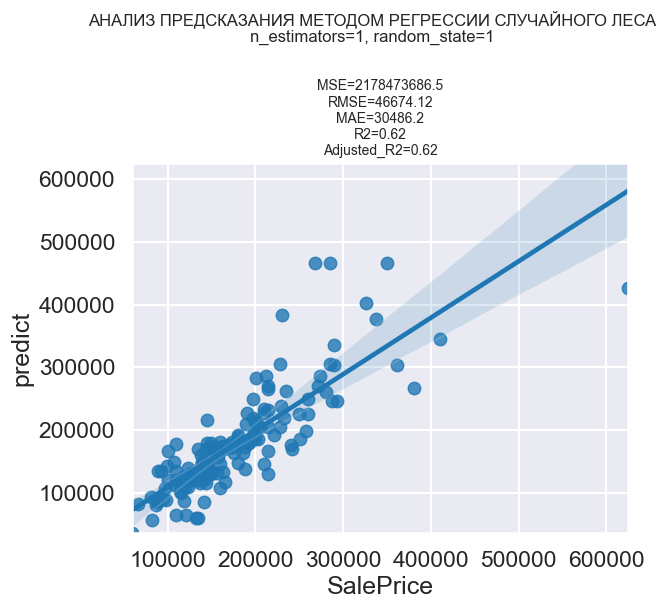

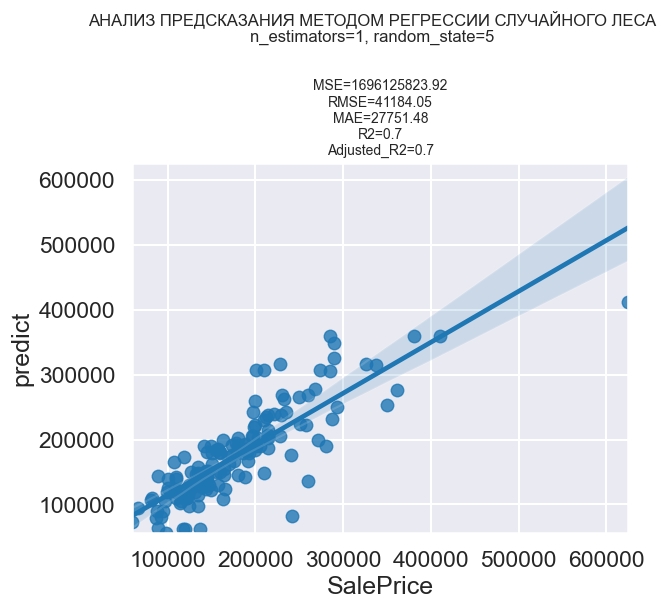

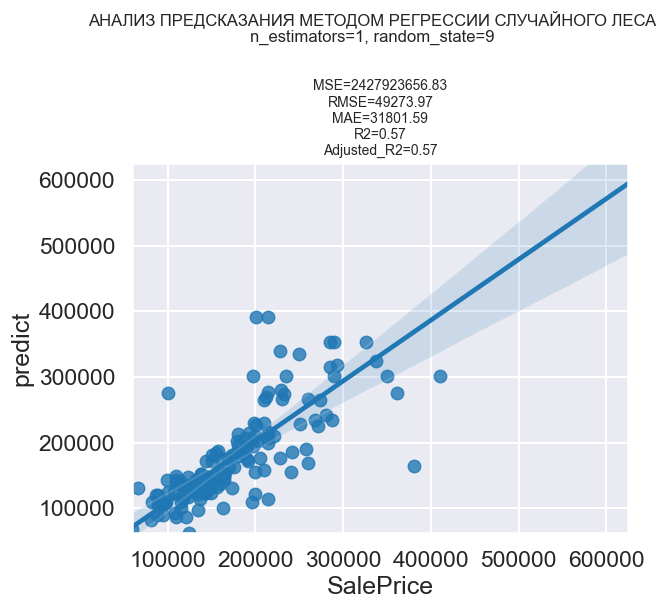

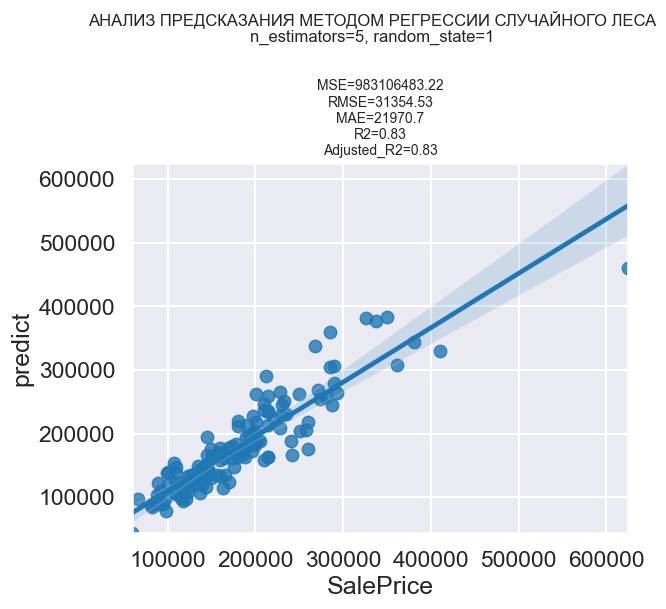

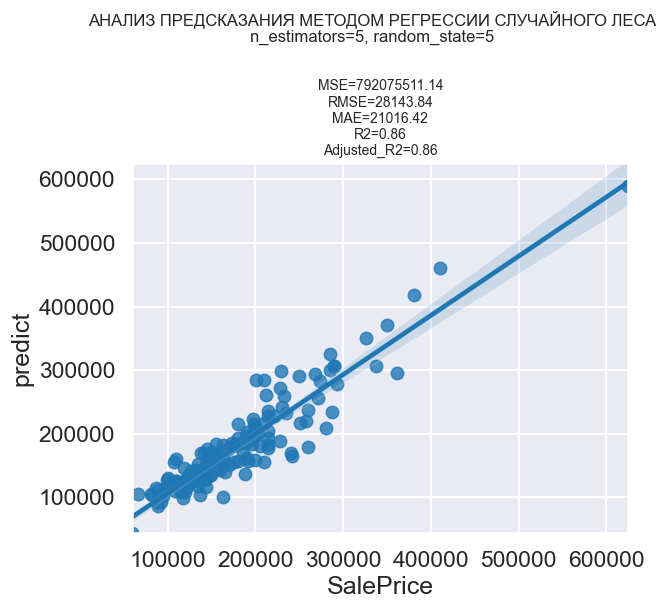

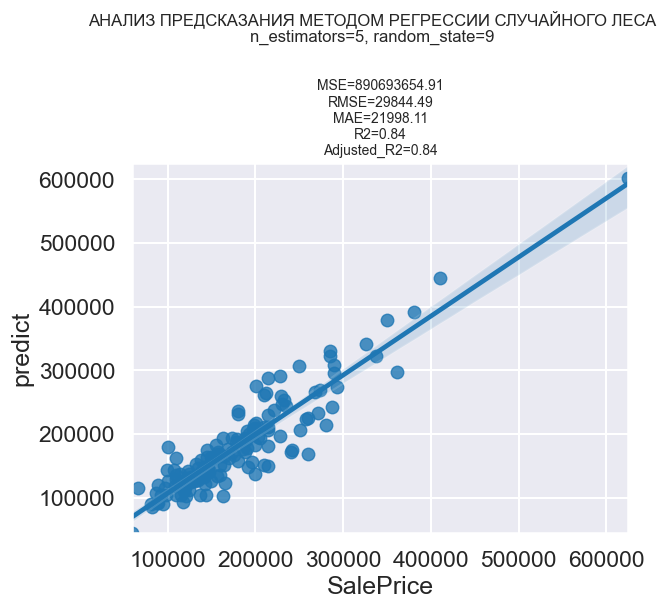

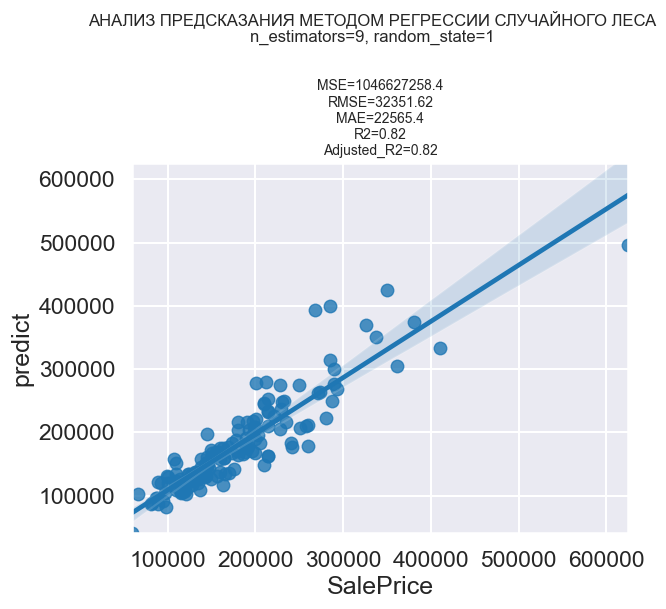

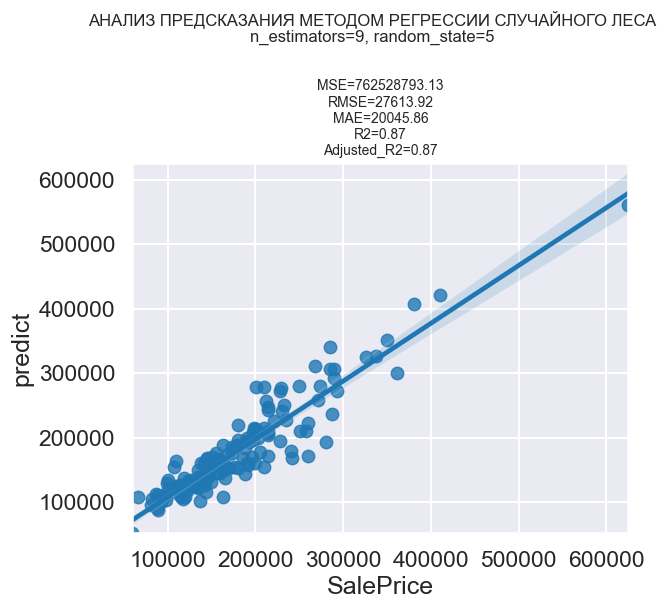

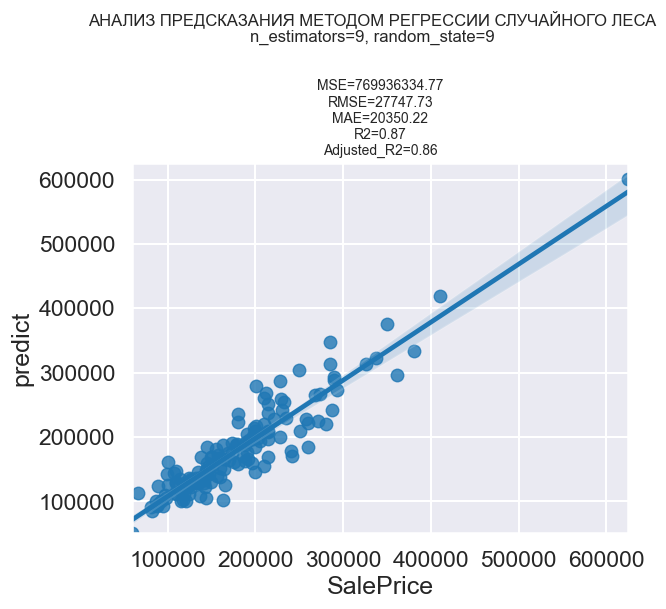

In [40]:
# словарь метрик леса
forest_metrics_dict = {}
# ПОСТРОЕНИЕ ГРАФИКОВ СРАВНЕНИЯ ПРЕДСКАЗАНИЯ РЕГРЕССИИ СЛУЧАЙНЫЙ ЛЕС
for n_estimators in range(1,11,4):
    for random_state in range(1,11,4):
        _, _, df_forest_metrics = combination_forest(df_train=df_FINAL_TRAIN, df_test=df_FINAL_TEST,
                            parameters=important_list, n_estimators=n_estimators, random_state=random_state)
        forest_metrics_dict[f"{n_estimators}_{random_state}"] = df_forest_metrics
# словарь метрик
metrics_dict['forest'] = forest_metrics_dict

***
### **2.5. Decision Tree**

#### **2.5.1. Построение регрессора дерева решений**

При различных комбинациях модель показывает результаты по метрикам хуже, чем у некоторых предыдущих моделей

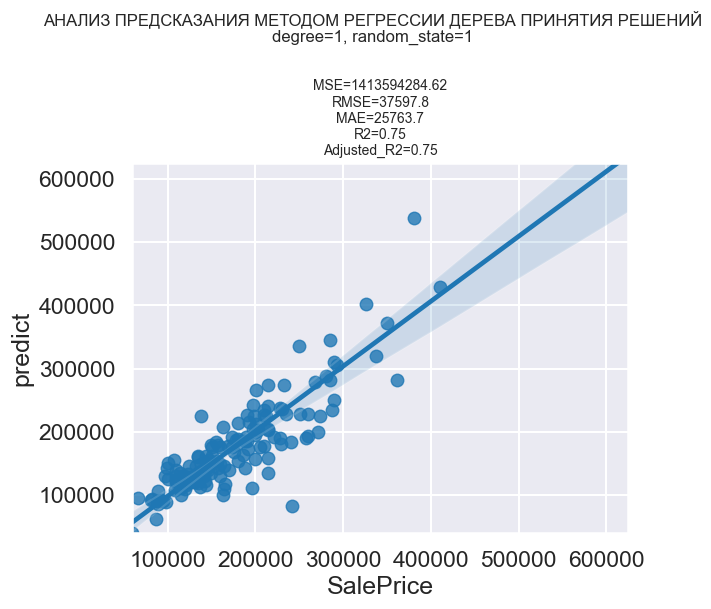

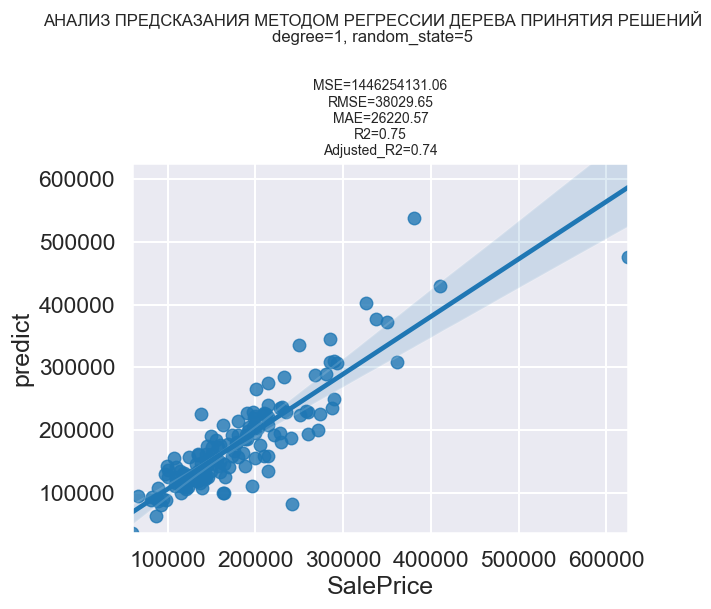

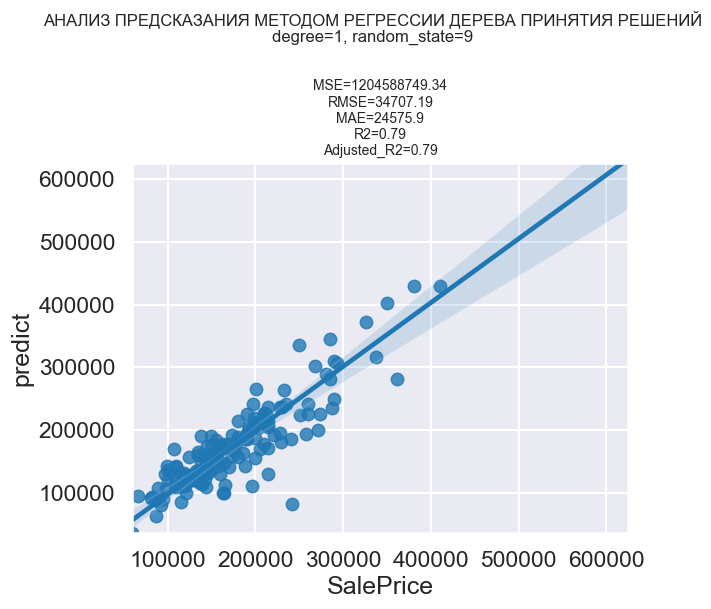

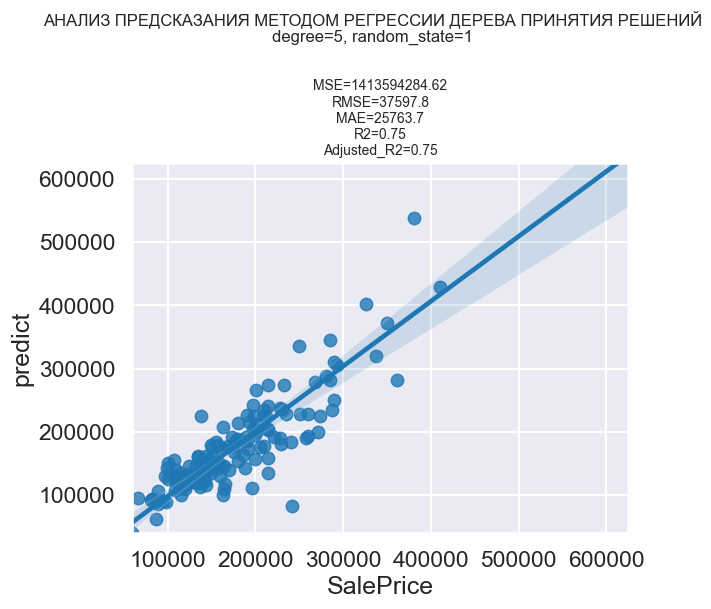

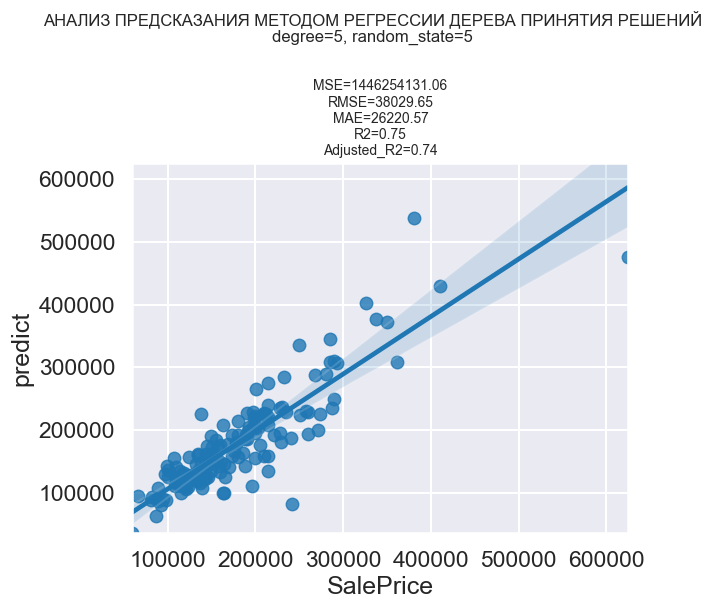

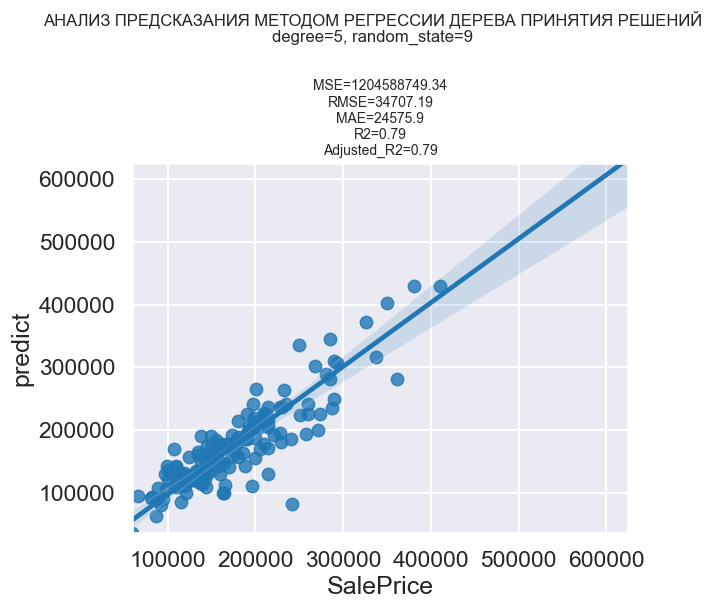

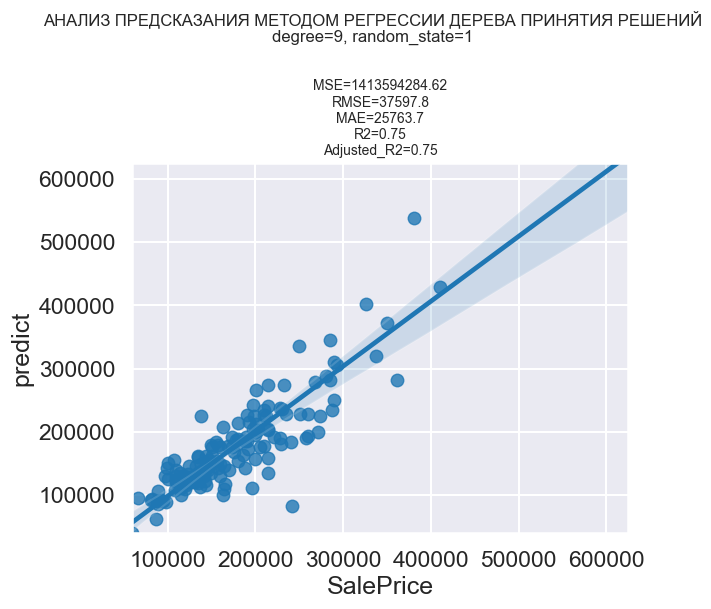

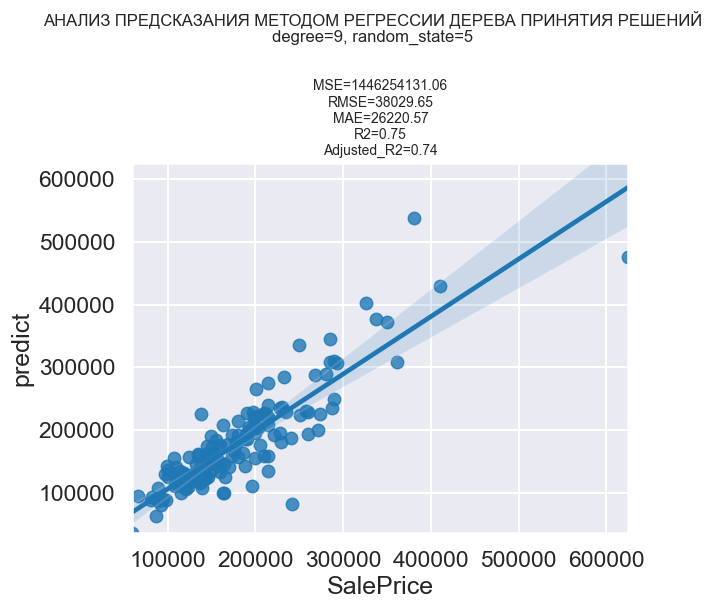

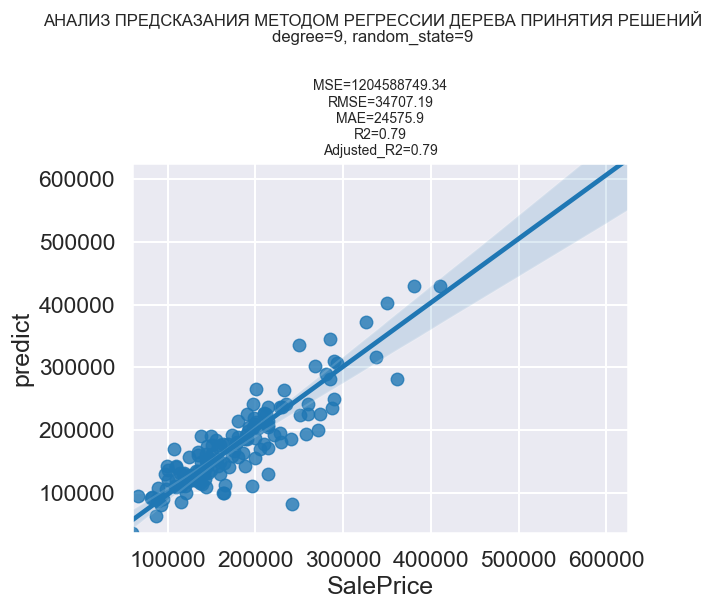

In [41]:
# словарь дерева решений
tree_metrics_dict = {}

# ПОСТРОЕНИЕ РЕГРЕССОРА ДЕРЕВА РЕШЕНИЙ
for degree in range(1,11,4):
    for random_state in range(1,11,4):
        _, _, df_tree_metrics = combination_decision_tree(df_train=df_FINAL_TRAIN, df_test=df_FINAL_TEST,
                                            parameters=important_list, degree=degree, random_state=random_state)

        tree_metrics_dict[f"{degree}_{random_state}"] = df_tree_metrics
# словарь метрик
metrics_dict['tree'] = tree_metrics_dict


***
### **2.6. SVК (Kernels)**


#### **2.6.1. Анализ предскащания SVR (LINEAR)**


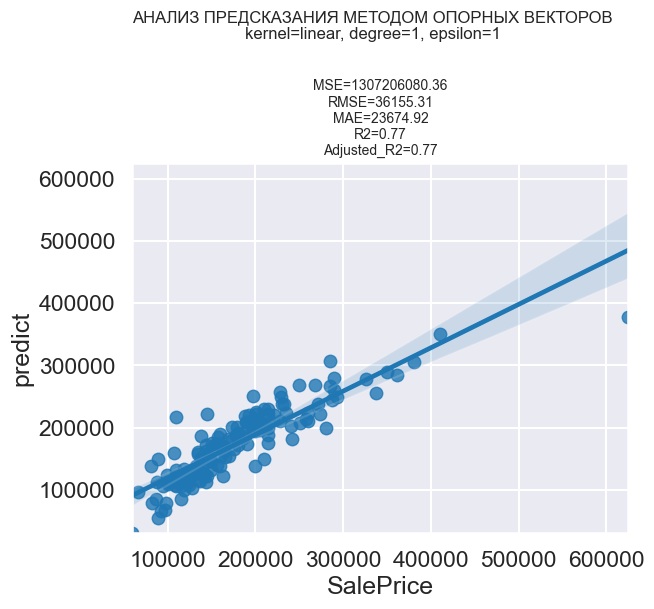

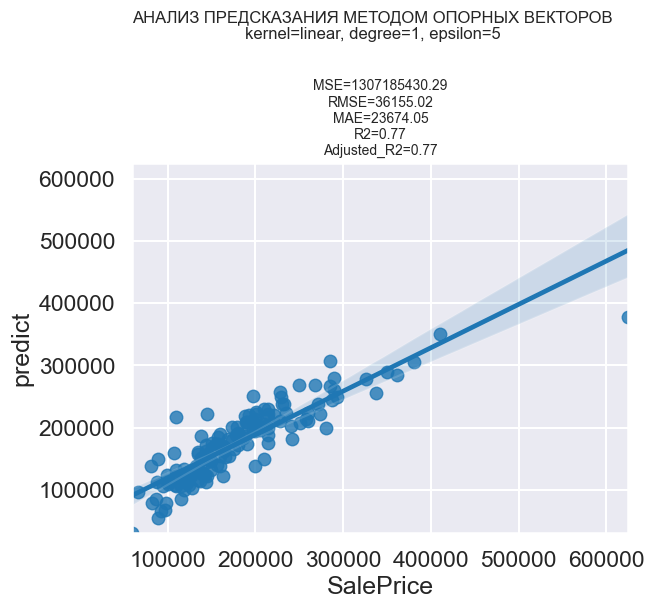

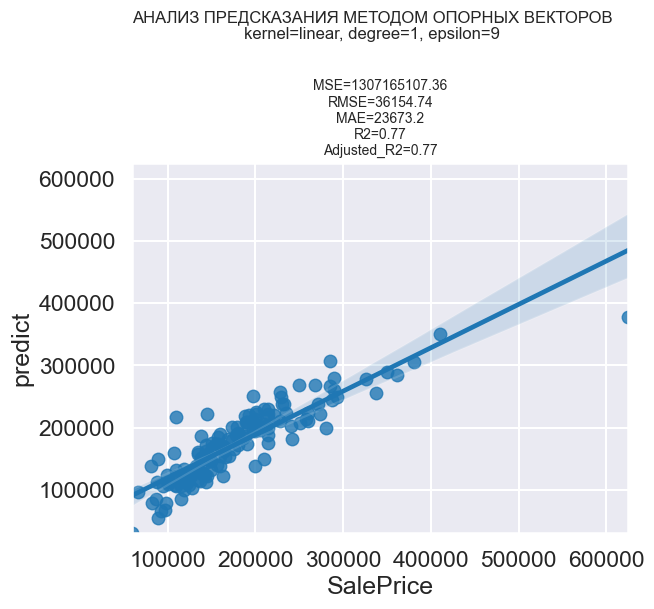

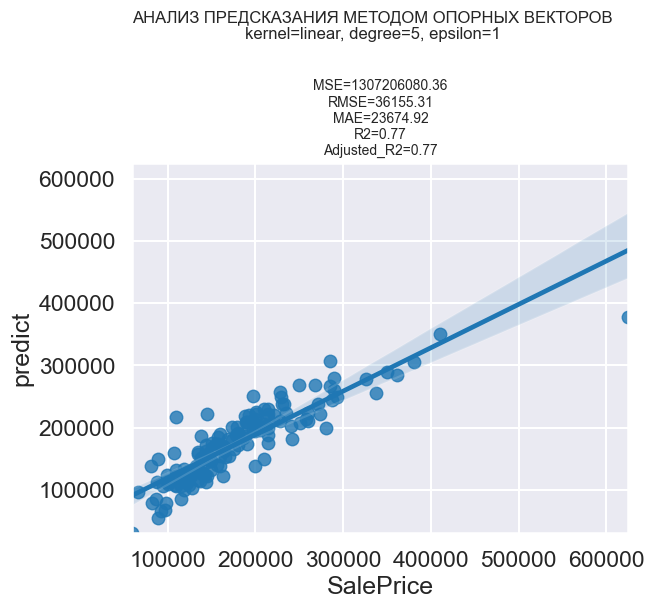

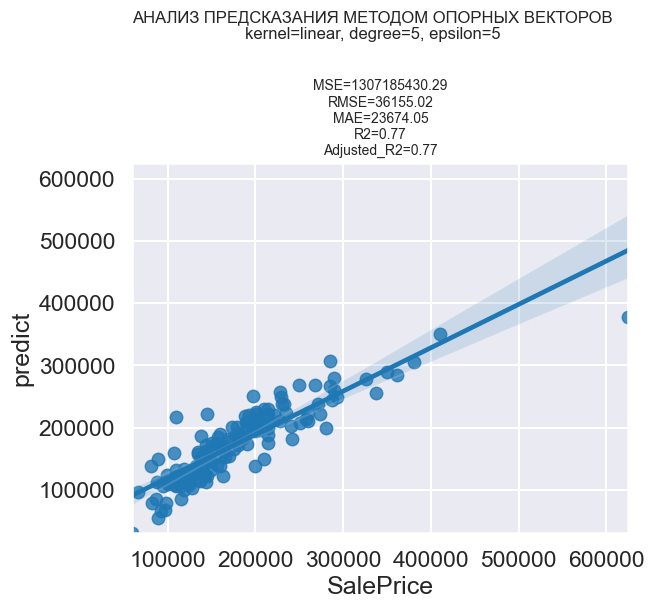

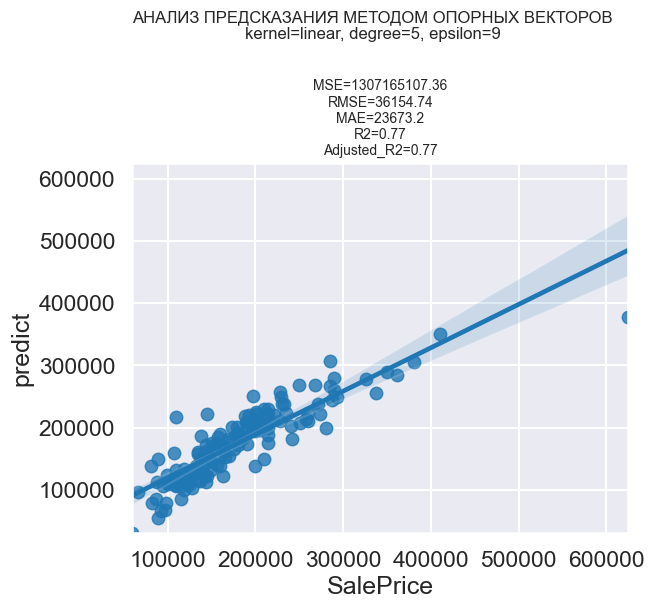

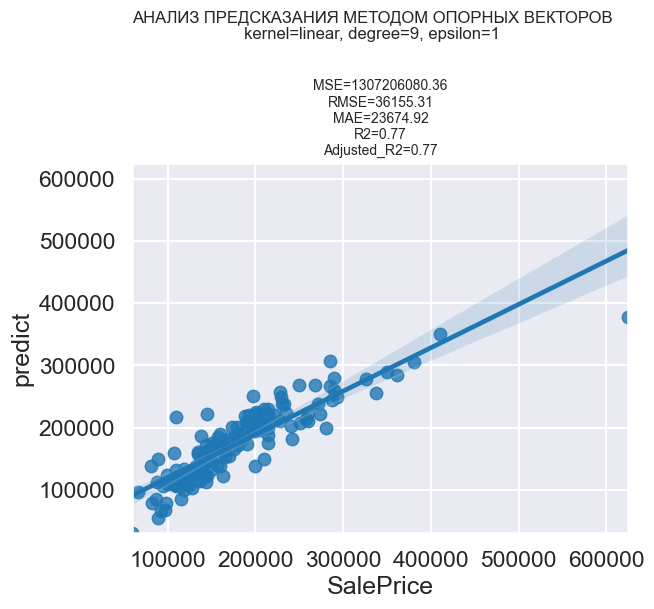

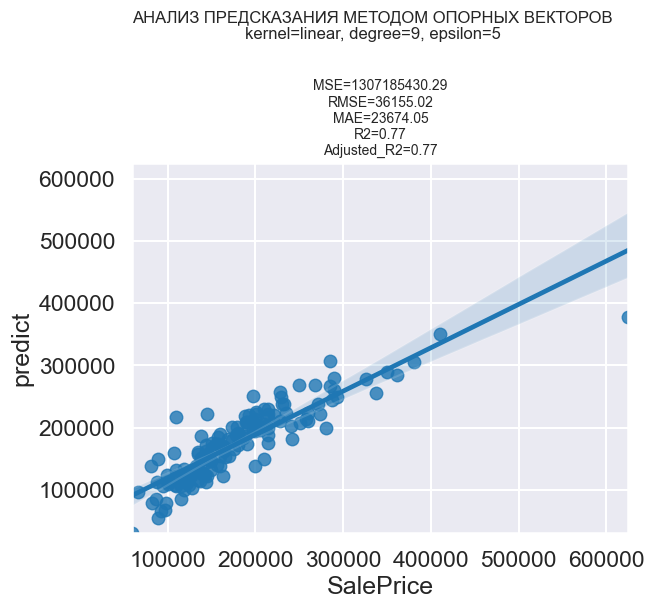

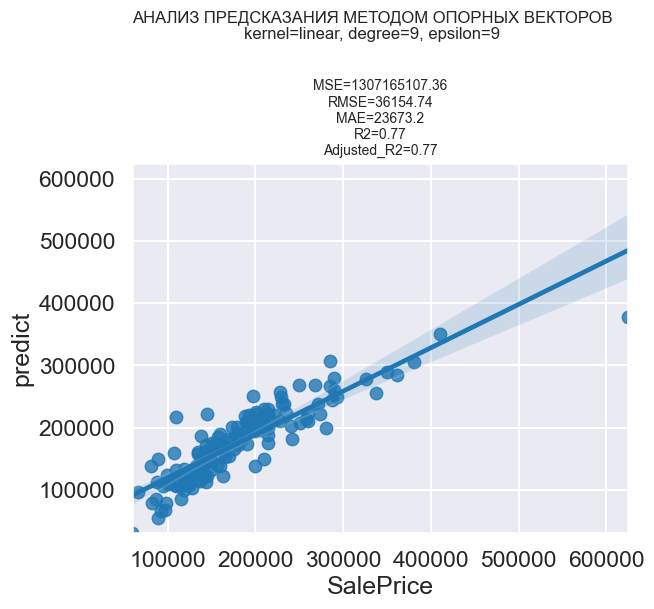

In [42]:
svm_metrics_dict = {}
# МЕТОД ОПОРНЫХ ВЕКТОРОВ (KERNELS)
for degree in range(1,11,4):
    for epsilon in range(1,11,4):
        _, _, df_svm_metrics = combination_svm(df_train=df_FINAL_TRAIN, df_test=df_FINAL_TEST,
                                            parameters=important_list, kernel="linear", degree=degree, epsilon=epsilon)
        svm_metrics_dict[f"linear_{degree}_{epsilon}"] = df_svm_metrics
# словарь метрик
metrics_dict['svm'] = svm_metrics_dict



***
#### **2.7.2. Анализ предсказания SVR (POLY)**

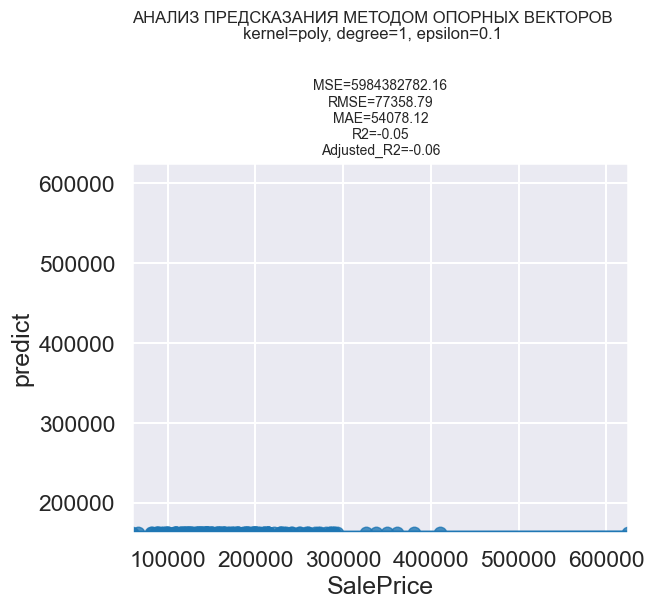

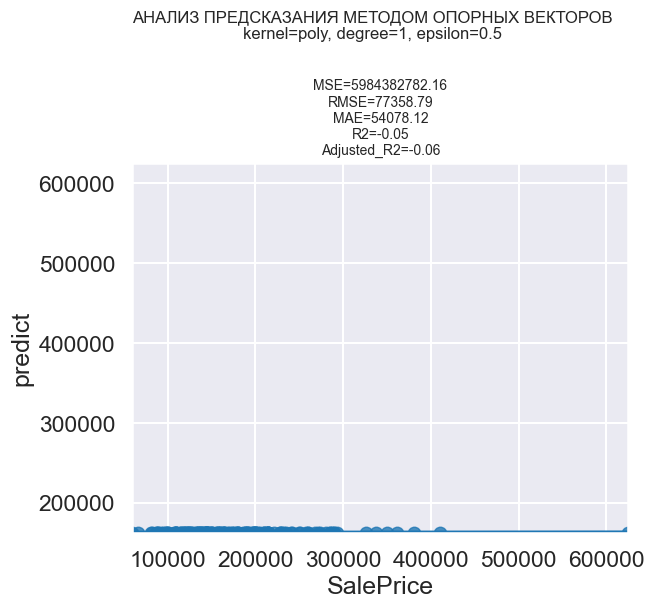

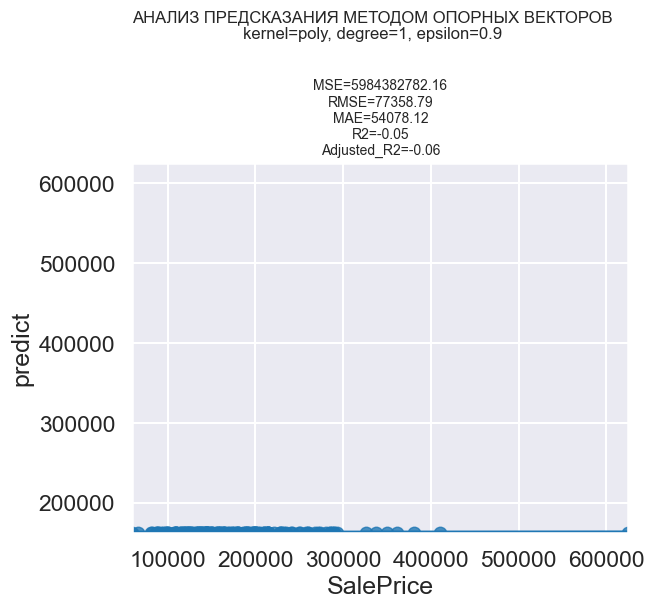

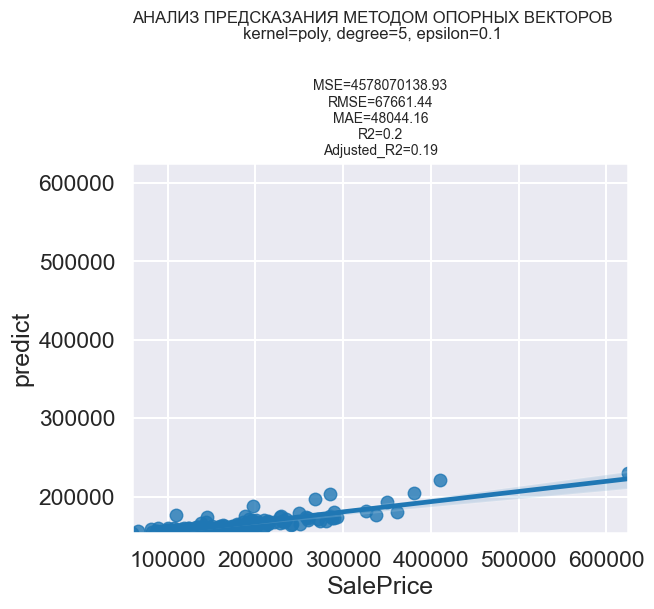

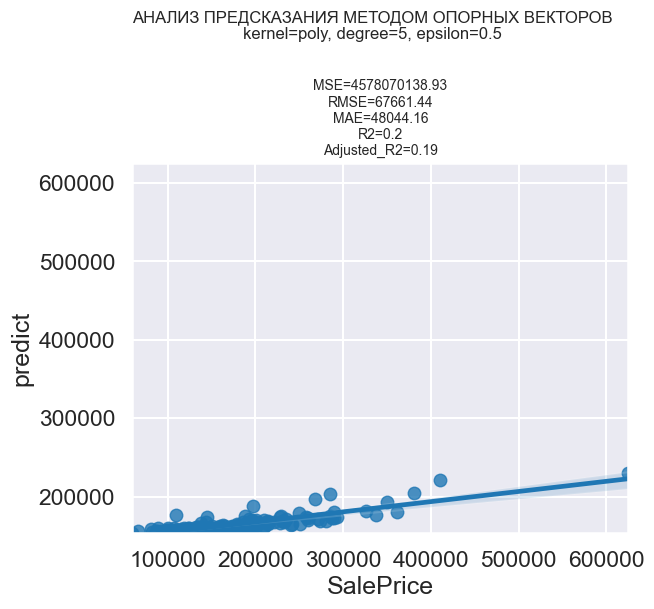

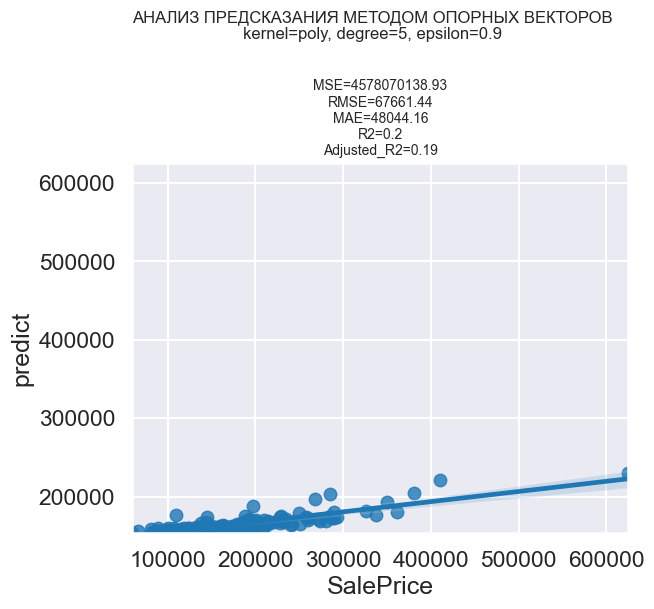

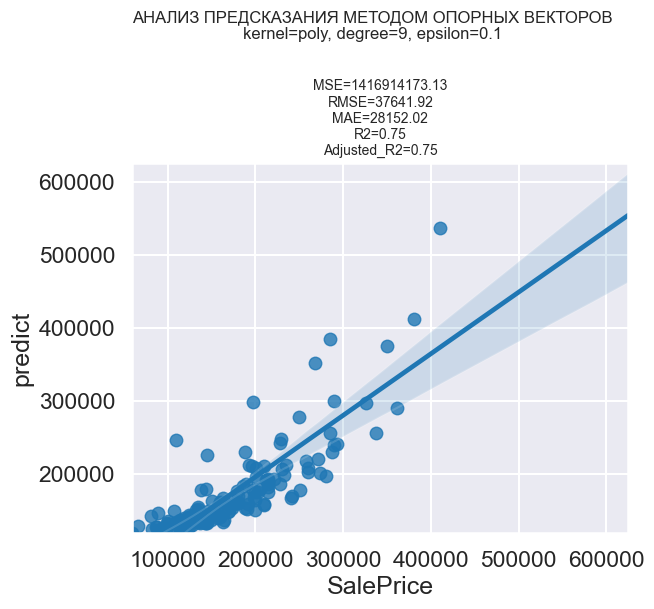

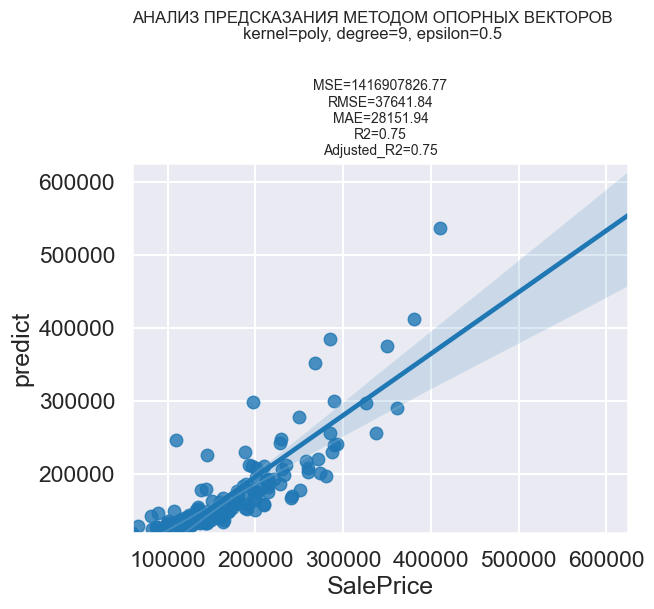

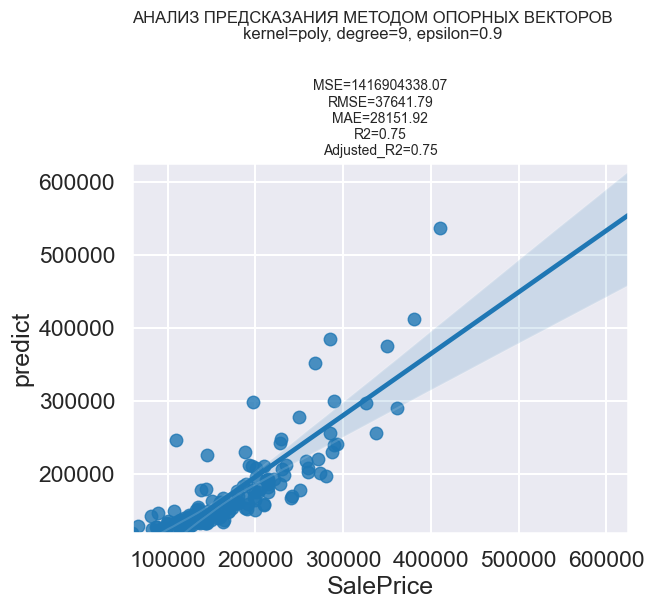

In [43]:
# МЕТОД ОПОРНЫХ ВЕКТОРОВ (KERNELS)
for degree in range(1,11,4):
    for epsilon in np.arange(0.1,1,0.4):
        _, _, df_svm_metrics= combination_svm(df_train=df_FINAL_TRAIN, df_test=df_FINAL_TEST,
                                            parameters=important_list, kernel="poly", degree=degree, epsilon=epsilon)

        svm_metrics_dict[f"poly_{degree}_{epsilon}"] = df_svm_metrics
# словарь метрик
metrics_dict['svm'] = svm_metrics_dict



***
### **2.8. GaussianNB**

Возможно, по причине того, что данная модель предназначена для классификации, она показала худшие результаты в определении цены дома с большими ошибками.

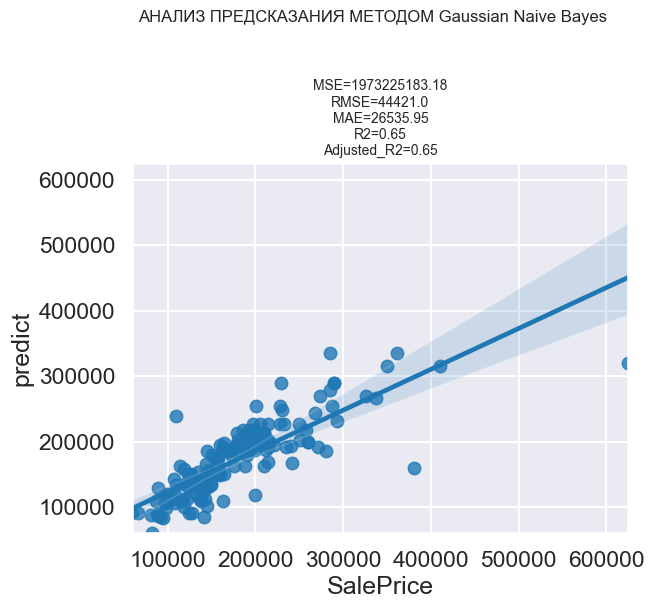

In [44]:
# ФУНКЦИЯ ПОСТРОЕНИЯ ГРАФИКОВ РЕГРЕССИИ Gaussian Naive Bayes
_, _, df_gnb_metrics = combination_gnb(df_train=df_FINAL_TRAIN, df_test=df_FINAL_TEST, parameters=important_list)

# словарь метрик
metrics_dict['gnb'] = [df_gnb_metrics]


***
### **2.10. Isotonic Regression**

Упорядочивает значения одной переменной относительно другой. Не смотря на то, что подходит для нелинейных зависимостей данных, показала полохие результаты.

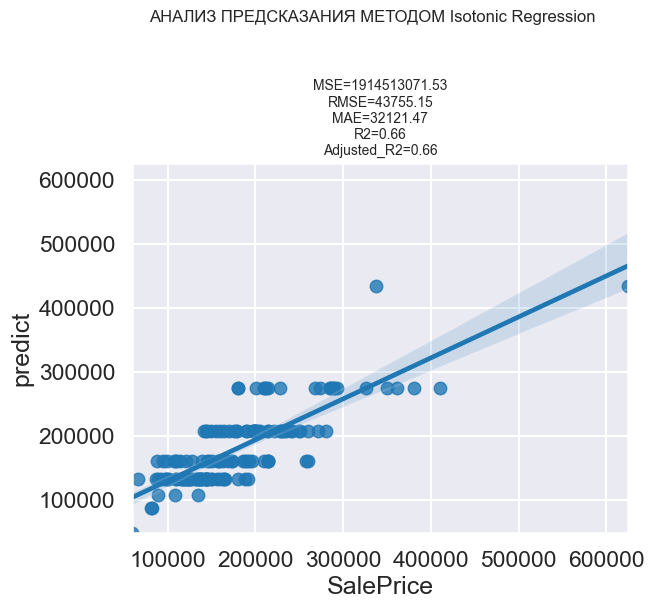

In [45]:
# ФУНКЦИЯ ПОСТРОЕНИЯ ГРАФИКОВ РЕГРЕССИИ Isotonic Regression
_, _, df_iso = combination_iso(df_train=df_FINAL_TRAIN, df_test=df_FINAL_TEST, parameters=important_list[1:2])

# словарь метрик
metrics_dict['iso'] = [df_iso]


# **3. <span style="color: red;">СРАВНЕНИЕ МОДЕЛЕЙ НА ОСНОВЕ МЕТРИК РЕГРЕССИИ</span>**

### **3.1. СРАВНЕНИЕ МЕТРИК**

In [46]:
# таблица метрик
df_comparison = df_metrics_construct(metrics_dict=metrics_dict)
df_comparison

MSE       RMSE       MAE      R2  \
polinomial_degree_2      627093293.15   25041.83  19431.21    0.89   
forest_9_5               762528793.13   27613.92  20045.86    0.87   
forest_9_9               769936334.77   27747.73  20350.22    0.87   
forest_5_5               792075511.14   28143.84  21016.42    0.86   
forest_5_9               890693654.91   29844.49  21998.11    0.84   
forest_5_1               983106483.22   31354.53  21970.70    0.83   
forest_9_1              1046627258.40   32351.62  22565.40    0.82   
multiple                1101284983.28   33185.61  23900.57    0.81   
tree_9_9                1204588749.34   34707.19  24575.90    0.79   
tree_1_9                1204588749.34   34707.19  24575.90    0.79   
tree_5_9                1204588749.34   34707.19  24575.90    0.79   
svm_linear_1_9          1307165107.36   36154.74  23673.20    0.77   
svm_linear_9_9          1307165107.36   36154.74  23673.20    0.77   
svm_linear_5_9          1307165107.36   36154.74  23673.20    0.77   
svm_linear_9_5          1307185430.29   36155.02  23674.05    0.77   
svm_linear_1_5          1307185430.29   36155.02  23674.05    0.77   
svm_linear_5_5          1307185430.29   36155.02  23674.05    0.77   
svm_linear_5_1          1307206080.36   36155.31  23674.92    0.77   
svm_linear_9_1          1307206080.36   36155.31  23674.92    0.77   
svm_linear_1_1          1307206080.36   36155.31  23674.92    0.77   
tree_9_1                1413594284.62   37597.80  25763.70    0.75   
tree_5_1                1413594284.62   37597.80  25763.70    0.75   
tree_1_1                1413594284.62   37597.80  25763.70    0.75   
svm_poly_9_0.9          1416904338.07   37641.79  28151.92    0.75   
svm_poly_9_0.5          1416907826.77   37641.84  28151.94    0.75   
svm_poly_9_0.1          1416914173.13   37641.92  28152.02    0.75   
tree_1_5                1446254131.06   38029.65  26220.57    0.75   
tree_9_5                1446254131.06   38029.65  26220.57    0.75   
tree_5_5                1446254131.06   38029.65  26220.57    0.75   
forest_1_5              1696125823.92   41184.05  27751.48    0.70   
iso                     1914513071.53   43755.15  32121.47    0.66   
simple                  1929285751.95   43923.64  30717.50    0.20   
gnb                     1973225183.18   44421.00  26535.95    0.65   
forest_1_1              2178473686.50   46674.12  30486.20    0.62   
forest_1_9              2427923656.83   49273.97  31801.59    0.57   
svm_poly_5_0.1          4578070138.93   67661.44  48044.16    0.20   
svm_poly_5_0.5          4578070138.93   67661.44  48044.16    0.20   
svm_poly_5_0.9          4578070138.93   67661.44  48044.16    0.20   
polinomial_degree_4     5537083775.73   74411.58  34111.01    0.03   
svm_poly_1_0.1          5984382782.16   77358.79  54078.12   -0.05   
svm_poly_1_0.5          5984382782.16   77358.79  54078.12   -0.05   
svm_poly_1_0.9          5984382782.16   77358.79  54078.12   -0.05   
polinomial_degree_20  113205847669.41  336460.77  65158.90  -18.84   
polinomial_degree_10  113205847669.41  336460.77  65158.90  -18.84   
polinomial_degree_8   652618443126.96  807848.03 104218.99 -113.36   
polinomial_degree_6  2169586783651.44 1472951.72 184412.78 -379.17   

                      Adjusted_R2  
polinomial_degree_2          0.89  
forest_9_5                   0.87  
forest_9_9                   0.86  
forest_5_5                   0.86  
forest_5_9                   0.84  
forest_5_1                   0.83  
forest_9_1                   0.82  
multiple                     0.81  
tree_9_9                     0.79  
tree_1_9                     0.79  
tree_5_9                     0.79  
svm_linear_1_9               0.77  
svm_linear_9_9               0.77  
svm_linear_5_9               0.77  
svm_linear_9_5               0.77  
svm_linear_1_5               0.77  
svm_linear_5_5               0.77  
svm_linear_5_1               0.77  
svm_linear_9_1               0.77  
svm_linear_1_1         

### **3.2. Динамика метрик регрессий**

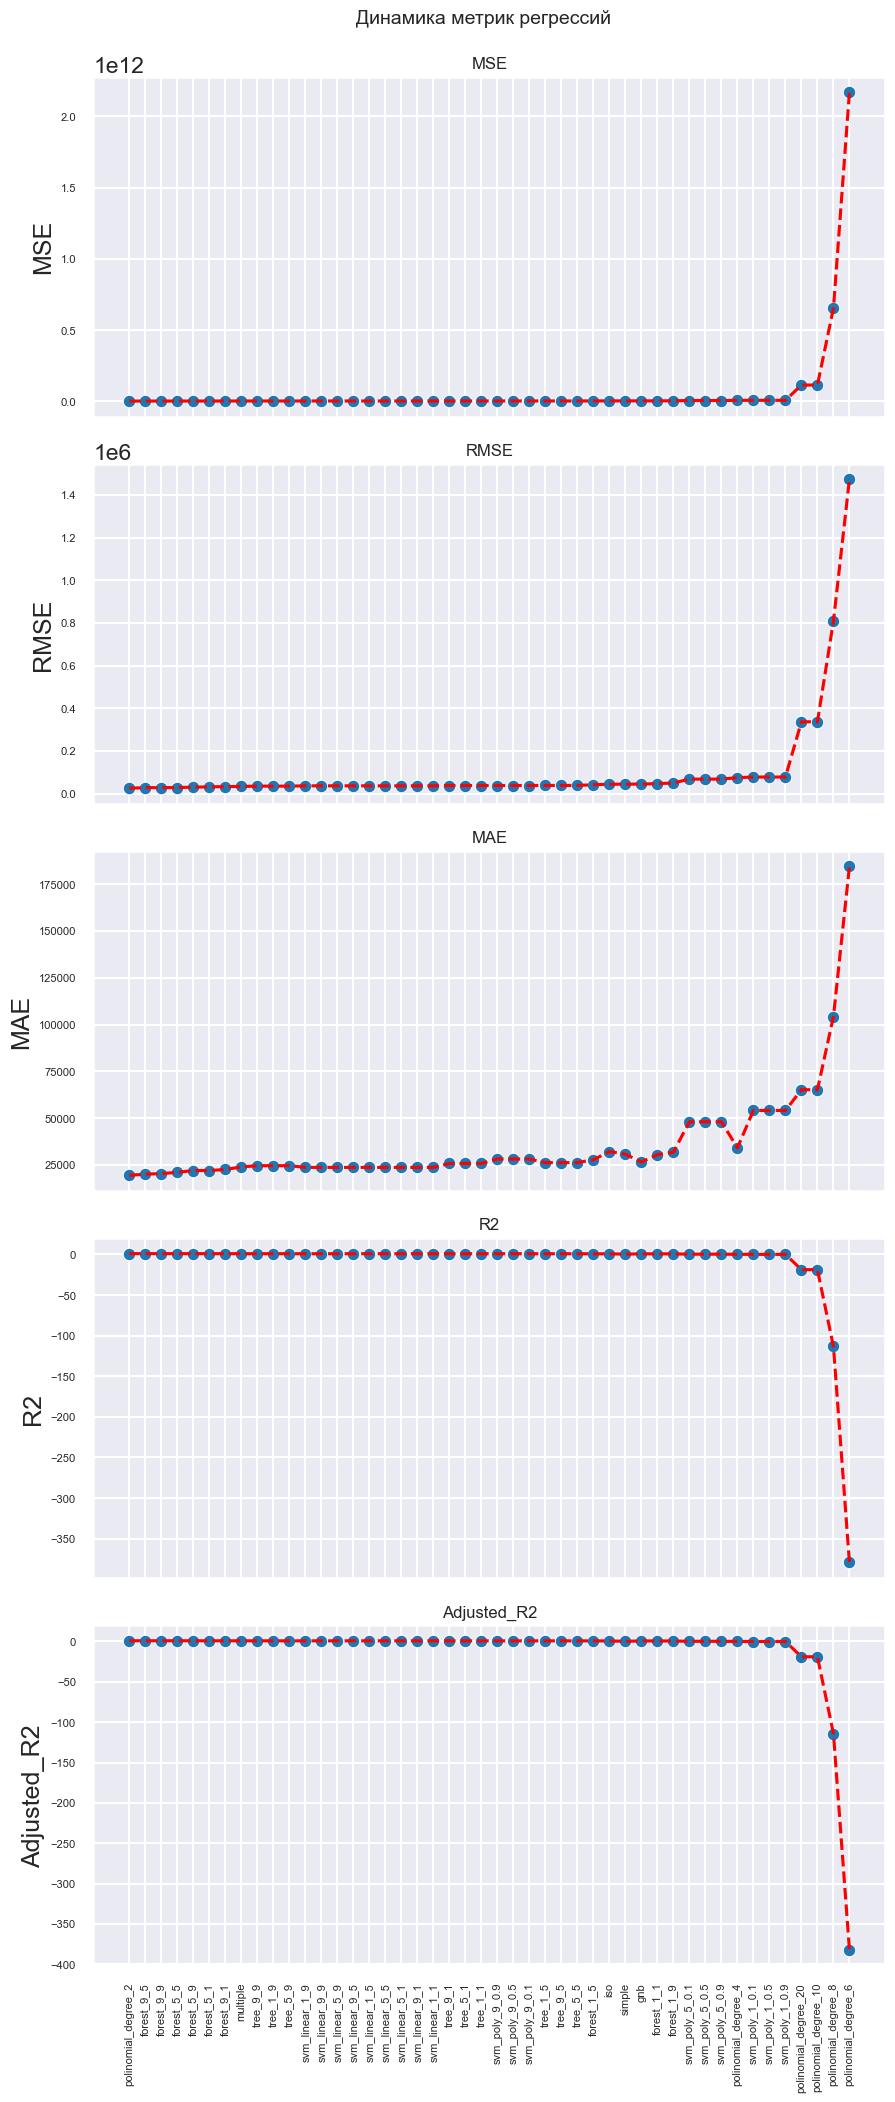

In [47]:
# Динамика метрик регрессий
fig, axs = plt.subplots(5,1, sharex=True, figsize=(10,20))
for key, val in enumerate(METRICS_LIST):
    axs[key].set_title(val, fontsize=12);
    axs[key].plot(df_comparison[val], "r--");          # график 1
    sns.scatterplot(df_comparison[val], ax=axs[key]);  # график 2

    axs[key].tick_params(axis='y', labelsize=8)
    plt.tight_layout();

fig.suptitle("Динамика метрик регрессий", fontsize=14, y=1.01)
# plt.yticks(fontsize=8);
plt.xticks(rotation=90, fontsize=8);

***
### **3.3. <span style="color: red;">РЕЗЮМЕ</span>**

Все модели показали плохие результаты.

**Наилучшие** показатели у `Polynomial Multy Linear Regression` (*degree=2, interaction_only=True*).

Ни одна модель не рекомендуется к предсказанию цены дома. Требуется дополнительное изучение моделей с нелинейным поведением.